In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
np.random.seed(13)
from sklearn import svm
import pandas as pd
import matplotlib.pyplot as plt
import math
from __future__ import division
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from stockstats import StockDataFrame 
from googlefinance.client import get_price_data, get_prices_data, get_prices_time_data

import dataPreparation
files=['AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALGN',
          'ALXN', 'AMAT', 'AMGN', 'AMZN', 'ATVI', 'AVGO', 'BIDU', 
          'BIIB', 'BMRN', 'CA', 'CELG', 'CERN', 'CHTR', 'CMCSA',
          'COST', 'CSCO', 'CSX', 'CTAS', 'CTRP', 'CTSH', 'CTXS',
          'DISCA', 'DISH', 'DLTR', 'EA', 'EBAY', 'ESRX', 'EXPE',
          'FAST', 'FB', 'FISV', 'FOXA', 'GILD', 'GOOGL', 'HAS',
          'HOLX', 'HSIC', 'IDXX', 'ILMN', 'INCY', 'INTC', 'INTU',
          'ISRG', 'JBHT', 'JD', 'KHC', 'KLAC', 'LBTYA', 'LRCX', 'MAR',
          'MAT', 'MCHP', 'MDLZ', 'MELI', 'MNST', 'MSFT', 'MU', 'MXIM',
          'MYL', 'NFLX', 'NTES', 'NVDA', 'ORLY', 'PAYX', 'PCAR', 'PCLN',
          'PYPL', 'QCOM', 'REGN', 'ROST', 'SBUX', 'SHPG', 'SIRI', 'STX',
          'SWKS', 'SYMC', 'TMUS', 'TSCO', 'TSLA', 'TXN', 'ULTA', 'VIAB',
          'VOD', 'VRSK', 'VRTX', 'WBA', 'WYNN', 'XLNX', 'XRAY']
prices=list()
for file in files:
    param = {
        'q': file, # Stock symbol (ex: "AAPL")
        'i': "900", # Interval size in seconds ("86400" = 1 day intervals)
        'x': "NASD", # INDEXNASDAQStock exchange symbol on which stock is traded (ex: "NASD")
        'p': "2Y" # Period (Ex: "1Y" = 1 year)
        }
    priceData = get_price_data(param)
    stock = StockDataFrame.retype(priceData)
    price = pd.DataFrame(stock)
    string=['close_2_sma','close_4_sma','close_6_sma','close_8_sma','close_10_sma','close_12_sma','close_14_sma','close_16_sma','close_18_sma','pdi','mdi','dx','adx','adxr','cr','cr-ma1','cr-ma2','cr-ma3','boll','boll_ub','boll_lb','volume_-2_d','volume_-4_d','volume_-6_d','volume_-8_d','volume_-10_d','volume_-12_d','macd','macds','macdh','kdjk','kdjd','kdjj','tr','atr','wr_2','wr_10','wr_6','wr_8','wr_12','wr_14','close_-2_d','close_-4_d','close_-6_d','close_-8_d','close_-10_d','close_-12_d','close_-14_d','close_-16_d','rsi_2','rsi_4','rsi_6','rsi_8','rsi_10','rsi_12','rsi_14','rsi_16']

    stock.get(string)
    price = stock
    print(price)
    
    #['macd','macds', 'boll_ub', 'boll_lb','rsi_6','rsi_12','vr_6_sma','wr_10','wr_6''close_10_sma''tr''middle_{}_sma'
    #df['dma'] = df['close_10_sma'] - df['close_50_sma'] pdi'] = cls._get_pdi(df, 14)df['mdi'] = cls._get_mdi(df, 14)
    #df['dx'] = cls._get_dx(df, 14) df['adx'] = df['dx_6_ema'] df['adxr'] = df['adx_6_ema']]
    #

    prices.append(price)

/home/andrea/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


                         open      high      low     close   volume  \
2017-06-30 23:15:00  144.3400  144.5200  144.270  144.3700   457476   
2017-06-30 23:30:00  144.3800  144.4900  144.180  144.2350   426404   
2017-06-30 23:45:00  144.2350  144.3400  144.120  144.2900   422190   
2017-07-01 00:00:00  144.2902  144.7300  144.240  144.6700   467900   
2017-07-01 00:15:00  144.6700  144.7100  144.540  144.6201   288215   
2017-07-01 00:30:00  144.6200  144.6599  144.400  144.6050   341132   
2017-07-01 00:45:00  144.6100  144.6300  144.380  144.4500   238197   
2017-07-01 01:00:00  144.4500  144.4700  144.100  144.2000   434704   
2017-07-01 01:15:00  144.2000  144.4599  144.200  144.4599   276902   
2017-07-01 01:30:00  144.4500  144.5200  144.400  144.4750   226326   
2017-07-01 01:45:00  144.4800  144.6500  144.400  144.5699   286475   
2017-07-01 02:00:00  144.5600  144.6500  144.430  144.5250   244652   
2017-07-01 02:15:00  144.5200  144.5200  144.320  144.4700   329376   
2017-0

                         open      high       low     close  volume  \
2017-06-30 23:15:00  142.1200  142.2200  141.9924  142.1000   42260   
2017-06-30 23:30:00  142.0600  142.3300  142.0400  142.1000   28113   
2017-06-30 23:45:00  142.0800  142.1500  141.9500  142.1100   37017   
2017-07-01 00:00:00  142.1000  142.3600  142.0300  142.2600   31668   
2017-07-01 00:15:00  142.2600  142.4500  142.1300  142.3800   30918   
2017-07-01 00:30:00  142.3500  142.3500  142.1100  142.2200   31425   
2017-07-01 00:45:00  142.2000  142.2500  141.9500  142.0400   21784   
2017-07-01 01:00:00  142.0354  142.0354  141.8800  142.0300   21834   
2017-07-01 01:15:00  142.0900  142.1500  141.9800  142.0700   39512   
2017-07-01 01:30:00  142.1100  142.2400  142.0000  142.1750   30526   
2017-07-01 01:45:00  142.1900  142.4200  142.1200  142.2700   26761   
2017-07-01 02:00:00  142.2500  142.4500  142.2500  142.4300   23964   
2017-07-01 02:15:00  142.4300  142.5000  142.3400  142.4583   28834   
2017-0

                        open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  77.8950  77.8950  77.7350  77.7800   58247     77.78000   
2017-06-30 23:30:00  77.7856  77.8190  77.4600  77.4850   66103     77.63250   
2017-06-30 23:45:00  77.4676  77.6426  77.3800  77.5400   71633     77.51250   
2017-07-01 00:00:00  77.5350  77.7700  77.5000  77.7200   53111     77.63000   
2017-07-01 00:15:00  77.7100  77.8605  77.6900  77.8400   33412     77.78000   
2017-07-01 00:30:00  77.8300  77.9500  77.7800  77.8699   30298     77.85495   
2017-07-01 00:45:00  77.8780  77.9499  77.8300  77.9100   20159     77.88995   
2017-07-01 01:00:00  77.9100  77.9100  77.7798  77.8300   32828     77.87000   
2017-07-01 01:15:00  77.8200  77.8800  77.7700  77.8200   27153     77.82500   
2017-07-01 01:30:00  77.8400  77.9100  77.7800  77.8400   30346     77.83000   
2017-07-01 01:45:00  77.8300  77.9700  77.8000  77.9500   18432     77.89500   
2017-07-01 02:00:00  77.9200  77.9600  7

                         open      high       low     close  volume  \
2017-06-30 23:15:00  102.1900  102.5200  102.1900  102.4200   47891   
2017-06-30 23:30:00  102.4400  102.5500  102.4100  102.4500   65755   
2017-06-30 23:45:00  102.4400  102.5000  102.3338  102.4700   76908   
2017-07-01 00:00:00  102.4700  102.6500  102.4500  102.6400   22589   
2017-07-01 00:15:00  102.6400  102.6500  102.4800  102.5900   44009   
2017-07-01 00:30:00  102.5800  102.5800  102.4400  102.5400   81169   
2017-07-01 00:45:00  102.5400  102.7000  102.5300  102.6861   44337   
2017-07-01 01:00:00  102.6800  102.7200  102.6100  102.7100   31495   
2017-07-01 01:15:00  102.7100  102.7100  102.6300  102.6400   38420   
2017-07-01 01:30:00  102.6350  102.6600  102.5405  102.6200   84285   
2017-07-01 01:45:00  102.6100  102.7200  102.5900  102.6500   34027   
2017-07-01 02:00:00  102.6400  102.6700  102.5800  102.6600   36593   
2017-07-01 02:15:00  102.6600  102.7400  102.6350  102.7000   31927   
2017-0

                         open      high       low     close  volume  \
2017-06-30 23:15:00  101.8700  101.8700  101.5100  101.7400   29606   
2017-06-30 23:30:00  101.7000  101.8100  101.4800  101.5400   34153   
2017-06-30 23:45:00  101.5200  101.6300  101.3550  101.4500   45132   
2017-07-01 00:00:00  101.4150  101.8700  101.4100  101.8400   24445   
2017-07-01 00:15:00  101.8000  102.0200  101.7200  101.9600   22457   
2017-07-01 00:30:00  101.9600  101.9700  101.6460  101.9000   26412   
2017-07-01 00:45:00  101.8000  101.9600  101.5650  101.6060   17074   
2017-07-01 01:00:00  101.5900  101.5900  101.3400  101.5200   20495   
2017-07-01 01:15:00  101.5400  101.5900  101.4050  101.5900   25758   
2017-07-01 01:30:00  101.5900  101.5900  101.1900  101.3600   19841   
2017-07-01 01:45:00  101.3600  101.9400  101.3100  101.7700   27906   
2017-07-01 02:00:00  101.7400  101.7700  101.4500  101.5900   15830   
2017-07-01 02:15:00  101.5800  101.7100  101.4900  101.6700   25061   
2017-0

                        open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  49.9700  50.0200  49.9050  49.9150   38131     49.91500   
2017-06-30 23:30:00  49.9200  49.9200  49.7900  49.7900   39062     49.85250   
2017-06-30 23:45:00  49.7900  49.7900  49.6750  49.7500   42644     49.77000   
2017-07-01 00:00:00  49.7400  50.0100  49.7300  49.9000   27213     49.82500   
2017-07-01 00:15:00  49.8900  49.9700  49.7000  49.7200   70129     49.81000   
2017-07-01 00:30:00  49.7150  49.7500  49.6400  49.6700   36140     49.69500   
2017-07-01 00:45:00  49.6765  49.8700  49.6765  49.8100   20994     49.74000   
2017-07-01 01:00:00  49.8100  49.8700  49.8000  49.8425   21316     49.82625   
2017-07-01 01:15:00  49.8400  49.9601  49.8400  49.9600   18766     49.90125   
2017-07-01 01:30:00  49.9500  50.0400  49.9050  49.9600   50614     49.96000   
2017-07-01 01:45:00  49.9800  49.9800  49.8900  49.9534   20687     49.95670   
2017-07-01 02:00:00  49.9401  49.9401  4

                         open      high       low     close  volume  \
2017-06-30 23:15:00  149.4850  150.1300  149.0400  149.9100   34940   
2017-06-30 23:30:00  150.0490  150.5300  149.9200  150.0800   17582   
2017-06-30 23:45:00  150.1000  150.5500  150.0400  150.5145   16360   
2017-07-01 00:00:00  150.5400  150.7400  150.4500  150.6850    5518   
2017-07-01 00:15:00  150.6400  150.8100  150.4500  150.7000   22190   
2017-07-01 00:30:00  150.7550  150.8200  150.6300  150.7300    4396   
2017-07-01 00:45:00  150.7300  150.7350  150.4900  150.5300    5702   
2017-07-01 01:00:00  150.4600  150.6006  150.2610  150.6006    4255   
2017-07-01 01:15:00  150.6700  150.9500  150.4200  150.4200   12532   
2017-07-01 01:30:00  150.5000  150.5900  150.3600  150.4000    7609   
2017-07-01 01:45:00  150.3400  150.3700  150.1100  150.2900    6329   
2017-07-01 02:00:00  150.3000  150.5900  150.2600  150.5900   10316   
2017-07-01 02:15:00  150.4500  150.5130  150.0700  150.2700   12009   
2017-0

                         open     high       low     close  volume  \
2017-06-30 23:15:00  122.3500  122.480  122.0000  122.0000   57435   
2017-06-30 23:30:00  122.0100  122.320  121.8200  122.0800   48359   
2017-06-30 23:45:00  122.0800  122.320  122.0200  122.2900   23558   
2017-07-01 00:00:00  122.3000  122.380  122.0800  122.1200   32588   
2017-07-01 00:15:00  122.0700  122.080  121.7000  121.7500   22459   
2017-07-01 00:30:00  121.7300  121.980  121.6400  121.9350   26653   
2017-07-01 00:45:00  121.9250  122.400  121.8700  122.2400   47289   
2017-07-01 01:00:00  122.2000  122.420  122.1500  122.2800   22064   
2017-07-01 01:15:00  122.3100  122.430  121.9600  122.0800   30460   
2017-07-01 01:30:00  122.1100  122.270  121.8400  121.9000   32635   
2017-07-01 01:45:00  121.9499  122.020  121.7700  121.9810   25989   
2017-07-01 02:00:00  122.0000  122.280  121.9801  122.2400   18700   
2017-07-01 02:15:00  122.1800  122.430  122.1500  122.2400   27347   
2017-07-01 02:30:00 

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  41.5690  41.5690  41.3900  41.4350   265597     41.43500   
2017-06-30 23:30:00  41.4500  41.4600  41.2700  41.2800   214187     41.35750   
2017-06-30 23:45:00  41.2845  41.3412  41.2200  41.2886   240224     41.28430   
2017-07-01 00:00:00  41.2893  41.4600  41.2500  41.4200   199475     41.35430   
2017-07-01 00:15:00  41.4100  41.5000  41.3800  41.4900   114340     41.45500   
2017-07-01 00:30:00  41.4900  41.5850  41.4500  41.5400   119211     41.51500   
2017-07-01 00:45:00  41.5300  41.5500  41.4900  41.5300   130549     41.53500   
2017-07-01 01:00:00  41.5300  41.5300  41.4200  41.5300   163091     41.53000   
2017-07-01 01:15:00  41.5300  41.5850  41.5200  41.5550   115531     41.54250   
2017-07-01 01:30:00  41.5600  41.5900  41.5300  41.5800   126247     41.56750   
2017-07-01 01:45:00  41.5900  41.5900  41.4400  41.4500   193176     41.51500   
2017-07-01 02:00:00  41.4600

                         open      high       low     close  volume  \
2017-06-30 23:15:00  172.5700  172.9000  172.4900  172.7300   40802   
2017-06-30 23:30:00  172.7500  172.8000  172.4600  172.6400   35934   
2017-06-30 23:45:00  172.6100  172.6500  172.2900  172.6300   43740   
2017-07-01 00:00:00  172.6300  172.9300  172.4200  172.5200   59512   
2017-07-01 00:15:00  172.5000  172.5830  172.3000  172.5000   26881   
2017-07-01 00:30:00  172.4819  172.5700  172.3700  172.4100   36638   
2017-07-01 00:45:00  172.4400  172.5400  172.3100  172.3900   36824   
2017-07-01 01:00:00  172.3600  172.4300  172.3200  172.3995   36028   
2017-07-01 01:15:00  172.3600  172.3800  172.2100  172.2400   25949   
2017-07-01 01:30:00  172.2200  172.2500  172.0100  172.1700   30257   
2017-07-01 01:45:00  172.1900  172.3500  172.0500  172.1900   41411   
2017-07-01 02:00:00  172.2200  172.2900  172.1500  172.2000   38374   
2017-07-01 02:15:00  172.2100  172.3000  172.1500  172.2200   41507   
2017-0

                          open       high        low      close  volume  \
2017-06-30 23:15:00   978.9700   979.7900   977.3000   979.2100   81847   
2017-06-30 23:30:00   979.2550   979.5000   977.2000   977.8200   40909   
2017-06-30 23:45:00   977.2700   978.1100   976.2300   977.8650   79745   
2017-07-01 00:00:00   977.9700   978.9600   977.2500   978.7299   33763   
2017-07-01 00:15:00   978.5121   979.9200   978.0000   978.8000   43399   
2017-07-01 00:30:00   978.8750   979.6800   977.3900   977.8300   49368   
2017-07-01 00:45:00   977.7950   977.9400   976.1700   976.6000   46337   
2017-07-01 01:00:00   976.6100   976.6100   974.6600   974.9700   52557   
2017-07-01 01:15:00   975.1876   976.2000   974.8500   975.1300   34650   
2017-07-01 01:30:00   975.1400   976.2200   974.5500   976.2000   32491   
2017-07-01 01:45:00   976.2000   976.7500   975.0200   976.4700   31930   
2017-07-01 02:00:00   976.3185   976.8400   975.0600   975.7700   32316   
2017-07-01 02:15:00   975

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  57.6700  57.7200  57.5500  57.6700   102926     57.67000   
2017-06-30 23:30:00  57.6750  57.7100  57.5900  57.6073   103279     57.63865   
2017-06-30 23:45:00  57.6050  57.6700  57.5100  57.6400    87018     57.62365   
2017-07-01 00:00:00  57.6350  57.7100  57.6100  57.6400    57534     57.64000   
2017-07-01 00:15:00  57.6400  57.7600  57.6000  57.7200    98965     57.68000   
2017-07-01 00:30:00  57.7100  57.7500  57.6500  57.6800    61180     57.70000   
2017-07-01 00:45:00  57.6800  57.7050  57.6450  57.6900    72293     57.68500   
2017-07-01 01:00:00  57.6800  57.7800  57.6300  57.7800   126764     57.73500   
2017-07-01 01:15:00  57.7750  57.8699  57.7750  57.7900    89912     57.78500   
2017-07-01 01:30:00  57.8000  57.8950  57.7800  57.8400    79450     57.81500   
2017-07-01 01:45:00  57.8400  57.8950  57.7900  57.8300   108075     57.83500   
2017-07-01 02:00:00  57.8300

                         open      high       low    close  volume  \
2017-06-30 23:15:00  234.7200  234.9500  234.1800  234.230   45828   
2017-06-30 23:30:00  234.2700  234.5100  233.7500  233.960   38985   
2017-06-30 23:45:00  233.8400  234.3000  233.5100  234.030   52388   
2017-07-01 00:00:00  234.0800  234.5500  233.9900  234.130   55051   
2017-07-01 00:15:00  234.1200  234.1381  233.4900  233.490   49043   
2017-07-01 00:30:00  233.4900  233.9700  233.3100  233.710   61893   
2017-07-01 00:45:00  233.6600  233.7400  233.2900  233.570   70655   
2017-07-01 01:00:00  233.5800  233.6200  232.9800  233.255   62868   
2017-07-01 01:15:00  233.2925  233.5220  233.1900  233.330   38114   
2017-07-01 01:30:00  233.2600  233.3800  233.0600  233.380   29537   
2017-07-01 01:45:00  233.3600  234.0200  233.3300  233.860   35172   
2017-07-01 02:00:00  233.8600  233.8600  233.4100  233.800   24329   
2017-07-01 02:15:00  233.7600  233.8989  233.3000  233.850   35280   
2017-07-01 02:30:00 

                         open      high       low     close  volume  \
2017-06-30 23:15:00  179.1200  179.2100  178.7900  178.9800   37154   
2017-06-30 23:30:00  178.9500  179.2300  178.7800  179.0000   30666   
2017-06-30 23:45:00  178.9400  179.2100  178.7500  178.9750   31793   
2017-07-01 00:00:00  178.9700  179.0700  178.8134  179.0478   37090   
2017-07-01 00:15:00  179.0200  179.1400  178.7510  179.0300   47742   
2017-07-01 00:30:00  179.0600  179.0700  178.8900  178.9600   80403   
2017-07-01 00:45:00  178.9500  179.0700  178.6300  178.6725   25177   
2017-07-01 01:00:00  178.6800  178.9400  178.5900  178.9400   35843   
2017-07-01 01:15:00  178.9400  179.0000  178.7200  178.7900   15547   
2017-07-01 01:30:00  178.8200  178.8200  178.5100  178.6500   19326   
2017-07-01 01:45:00  178.6500  178.8300  178.4100  178.4100   48978   
2017-07-01 02:00:00  178.3300  178.6900  178.3101  178.4300   18834   
2017-07-01 02:15:00  178.4300  178.8400  178.3200  178.7700   34069   
2017-0

                         open      high       low     close  volume  \
2017-06-30 23:15:00  272.9200  273.0600  272.2800  272.5000   39190   
2017-06-30 23:30:00  272.5000  272.5000  271.9300  272.0300   19930   
2017-06-30 23:45:00  271.9400  272.3500  271.5000  272.2000   20036   
2017-07-01 00:00:00  272.1000  272.1000  271.1800  271.4400   39514   
2017-07-01 00:15:00  271.3900  271.3900  270.8900  270.8900   15168   
2017-07-01 00:30:00  270.8250  271.0200  270.1700  270.3561   21020   
2017-07-01 00:45:00  270.3400  270.8000  270.1700  270.1700   21527   
2017-07-01 01:00:00  270.2000  270.3200  269.9400  270.0600   15220   
2017-07-01 01:15:00  270.0800  270.3300  269.8300  270.1200   12301   
2017-07-01 01:30:00  270.0650  270.1700  269.7900  270.0500   18717   
2017-07-01 01:45:00  270.1000  270.1300  269.6650  269.7500   12030   
2017-07-01 02:00:00  269.7700  269.9700  269.7100  269.8400   14216   
2017-07-01 02:15:00  269.8750  270.0400  269.5800  270.0199   11128   
2017-0

                       open     high     low    close  volume  close_2_sma  \
2017-06-30 23:15:00  90.010  90.1100  89.920  90.0000   22394     90.00000   
2017-06-30 23:30:00  90.030  90.1200  89.830  90.0400   36098     90.02000   
2017-06-30 23:45:00  90.030  90.1800  89.830  90.1350   21743     90.08750   
2017-07-01 00:00:00  90.100  90.2100  90.040  90.1700   20252     90.15250   
2017-07-01 00:15:00  90.170  90.2500  90.010  90.1300   19207     90.15000   
2017-07-01 00:30:00  90.130  90.1500  89.980  90.0400    9441     90.08500   
2017-07-01 00:45:00  90.010  90.1100  89.590  89.6300   16700     89.83500   
2017-07-01 01:00:00  89.650  89.7100  89.540  89.6800    8829     89.65500   
2017-07-01 01:15:00  89.690  89.7725  89.580  89.6100    6800     89.64500   
2017-07-01 01:30:00  89.650  89.6800  89.540  89.6800    9054     89.64500   
2017-07-01 01:45:00  89.670  89.6700  89.370  89.3800   15887     89.53000   
2017-07-01 02:00:00  89.390  89.6600  89.390  89.6600    8276   

                        open     high      low   close  volume  close_2_sma  \
2017-06-30 23:15:00  34.5048  34.5100  34.4700  34.500   61400      34.5000   
2017-06-30 23:30:00  34.5000  34.5100  34.4300  34.465   78627      34.4825   
2017-06-30 23:45:00  34.4700  34.5200  34.4450  34.515   71697      34.4900   
2017-07-01 00:00:00  34.5200  34.5400  34.5100  34.530   38649      34.5225   
2017-07-01 00:15:00  34.5300  34.5700  34.5100  34.560   50409      34.5450   
2017-07-01 00:30:00  34.5500  34.5600  34.5300  34.530   54860      34.5450   
2017-07-01 00:45:00  34.5400  34.5700  34.5300  34.565   33051      34.5475   
2017-07-01 01:00:00  34.5700  34.5800  34.5500  34.570   58721      34.5675   
2017-07-01 01:15:00  34.5738  34.6000  34.5641  34.575   59354      34.5725   
2017-07-01 01:30:00  34.5800  34.6200  34.5700  34.585   69973      34.5800   
2017-07-01 01:45:00  34.5800  34.6250  34.5600  34.595   69835      34.5900   
2017-07-01 02:00:00  34.6000  34.6100  34.5400  34.5

                         open      high       low     close   volume  \
2017-06-30 23:15:00  130.1100  130.1600  129.7510  129.9300    62271   
2017-06-30 23:30:00  129.9500  130.0200  129.8600  129.9300    90412   
2017-06-30 23:45:00  129.8900  129.9250  129.7300  129.8300    52051   
2017-07-01 00:00:00  129.8399  129.9400  129.5900  129.6897    51002   
2017-07-01 00:15:00  129.6700  129.7400  129.4700  129.6400    54961   
2017-07-01 00:30:00  129.6200  129.8400  129.5300  129.8000    49611   
2017-07-01 00:45:00  129.8100  129.9200  129.7000  129.8800    41605   
2017-07-01 01:00:00  129.9100  129.9800  129.8600  129.9400    55115   
2017-07-01 01:15:00  129.9500  130.0300  129.8400  129.9500    86043   
2017-07-01 01:30:00  129.9400  129.9500  129.5500  129.8300    44298   
2017-07-01 01:45:00  129.8100  129.9750  129.7100  129.8650    62778   
2017-07-01 02:00:00  129.8400  130.1200  129.8400  129.9432    73790   
2017-07-01 02:15:00  129.9400  130.0700  129.8600  130.0400    5

                        open     high     low   close   volume  close_2_sma  \
2017-06-30 23:15:00  66.4300  66.5200  66.420  66.460    30314      66.4600   
2017-06-30 23:30:00  66.4501  66.4800  66.320  66.340    36902      66.4000   
2017-06-30 23:45:00  66.3100  66.4100  66.260  66.400    13121      66.3700   
2017-07-01 00:00:00  66.4000  66.4700  66.370  66.410    12890      66.4050   
2017-07-01 00:15:00  66.4070  66.4700  66.395  66.420    13183      66.4150   
2017-07-01 00:30:00  66.4300  66.4700  66.405  66.420    16598      66.4200   
2017-07-01 00:45:00  66.4200  66.4500  66.400  66.445     9899      66.4325   
2017-07-01 01:00:00  66.4400  66.4400  66.395  66.425    19738      66.4350   
2017-07-01 01:15:00  66.4250  66.4350  66.340  66.350    17353      66.3875   
2017-07-01 01:30:00  66.3500  66.3600  66.310  66.355    24731      66.3525   
2017-07-01 01:45:00  66.3500  66.4900  66.340  66.450    24369      66.4025   
2017-07-01 02:00:00  66.4500  66.4800  66.445  66.46

                        open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  334.020  335.170  333.800  334.780   25786     334.7800   
2017-06-30 23:30:00  334.830  334.860  333.790  334.000   17448     334.3900   
2017-06-30 23:45:00  333.960  336.390  333.920  335.930   28287     334.9650   
2017-07-01 00:00:00  335.720  336.450  335.660  335.860   22071     335.8950   
2017-07-01 00:15:00  335.800  336.560  335.740  336.245   39164     336.0525   
2017-07-01 00:30:00  336.230  337.360  336.120  337.250   27148     336.7475   
2017-07-01 00:45:00  337.280  337.480  336.030  336.100   25085     336.6750   
2017-07-01 01:00:00  335.990  336.040  335.490  335.645   21447     335.8725   
2017-07-01 01:15:00  335.795  336.760  335.460  336.450   56966     336.0475   
2017-07-01 01:30:00  336.380  336.600  335.930  335.950   13885     336.2000   
2017-07-01 01:45:00  336.020  336.390  335.970  336.200   13756     336.0750   
2017-07-01 02:00:00  336.190  336.400  3

                        open     high     low    close   volume  close_2_sma  \
2017-06-30 23:15:00  38.8600  38.9500  38.860  38.9400   291377     38.94000   
2017-06-30 23:30:00  38.9400  38.9700  38.890  38.9100   282401     38.92500   
2017-06-30 23:45:00  38.9100  38.9700  38.860  38.9400   410338     38.92500   
2017-07-01 00:00:00  38.9400  38.9950  38.930  38.9350   215321     38.93750   
2017-07-01 00:15:00  38.9300  39.0500  38.905  39.0300   325009     38.98250   
2017-07-01 00:30:00  39.0400  39.1100  39.020  39.1099   446975     39.06995   
2017-07-01 00:45:00  39.1000  39.1100  38.980  39.0000   207490     39.05495   
2017-07-01 01:00:00  39.0000  39.0700  38.945  39.0700   291201     39.03500   
2017-07-01 01:15:00  39.0700  39.0750  38.995  39.0000   269008     39.03500   
2017-07-01 01:30:00  39.0100  39.0300  38.960  38.9900   206670     38.99500   
2017-07-01 01:45:00  38.9910  39.0600  38.980  39.0100   165363     39.00000   
2017-07-01 02:00:00  39.0100  39.0700  3

                         open      high       low     close   volume  \
2017-06-30 23:15:00  159.2000  159.3000  159.1200  159.1500    56532   
2017-06-30 23:30:00  159.1700  159.1900  159.0000  159.0100    48668   
2017-06-30 23:45:00  159.0300  159.2100  159.0100  159.1080    38735   
2017-07-01 00:00:00  159.1300  159.1404  158.9600  159.0699    33837   
2017-07-01 00:15:00  159.0550  159.1700  158.9700  159.1410    23499   
2017-07-01 00:30:00  159.1600  159.2000  159.0700  159.1600    22304   
2017-07-01 00:45:00  159.1700  159.2500  159.0000  159.0131    26004   
2017-07-01 01:00:00  159.0300  159.0500  158.9100  159.0100    37439   
2017-07-01 01:15:00  159.0099  159.0500  158.9200  159.0000    27981   
2017-07-01 01:30:00  159.0000  159.2000  158.9400  159.2000    32112   
2017-07-01 01:45:00  159.1800  159.2996  159.1200  159.2500    29537   
2017-07-01 02:00:00  159.2500  159.4700  159.2210  159.4450    38467   
2017-07-01 02:15:00  159.4400  159.6100  159.4300  159.4700   19

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  31.3750  31.4000  31.3300  31.3600   538825     31.36000   
2017-06-30 23:30:00  31.3600  31.4300  31.3400  31.3501   608730     31.35505   
2017-06-30 23:45:00  31.3500  31.3900  31.3350  31.3401   428846     31.34510   
2017-07-01 00:00:00  31.3400  31.4100  31.3300  31.4100   430445     31.37505   
2017-07-01 00:15:00  31.4100  31.4500  31.3900  31.4350   389451     31.42250   
2017-07-01 00:30:00  31.4350  31.4500  31.4000  31.4100   377736     31.42250   
2017-07-01 00:45:00  31.4100  31.4400  31.3900  31.3950   268492     31.40250   
2017-07-01 01:00:00  31.4000  31.4000  31.3500  31.3500   374184     31.37250   
2017-07-01 01:15:00  31.3550  31.3800  31.3300  31.3700   370582     31.36000   
2017-07-01 01:30:00  31.3750  31.3800  31.3400  31.3600   325955     31.36500   
2017-07-01 01:45:00  31.3600  31.4000  31.3400  31.3700   373590     31.36500   
2017-07-01 02:00:00  31.3750

                        open     high      low   close   volume  close_2_sma  \
2017-06-30 23:15:00  54.2600  54.3000  54.2200  54.280    83989      54.2800   
2017-06-30 23:30:00  54.2700  54.2900  54.1499  54.160    83812      54.2200   
2017-06-30 23:45:00  54.1500  54.2290  54.1050  54.160    85217      54.1600   
2017-07-01 00:00:00  54.1600  54.3800  54.1500  54.370    88791      54.2650   
2017-07-01 00:15:00  54.3700  54.4400  54.3450  54.430    90675      54.4000   
2017-07-01 00:30:00  54.4200  54.4700  54.3900  54.450    77452      54.4400   
2017-07-01 00:45:00  54.4500  54.4500  54.3750  54.400    64916      54.4250   
2017-07-01 01:00:00  54.4200  54.4200  54.3100  54.330    60838      54.3650   
2017-07-01 01:15:00  54.3300  54.4000  54.3250  54.370    83089      54.3500   
2017-07-01 01:30:00  54.3601  54.4500  54.3550  54.450    45946      54.4100   
2017-07-01 01:45:00  54.4500  54.5600  54.3875  54.543   107205      54.4965   
2017-07-01 02:00:00  54.5400  54.5700  5

                         open      high       low     close  volume  \
2017-06-30 23:15:00  125.6500  126.1600  125.5900  126.1600   19885   
2017-06-30 23:30:00  126.1600  126.2800  126.0000  126.1600   22198   
2017-06-30 23:45:00  126.0869  126.1400  125.9650  126.1000   11397   
2017-07-01 00:00:00  126.1100  126.3400  126.0772  126.1300    7690   
2017-07-01 00:15:00  126.0500  126.3400  126.0000  126.3400    4770   
2017-07-01 00:30:00  126.2500  126.3200  126.2300  126.2600    7496   
2017-07-01 00:45:00  126.2600  126.3095  126.0400  126.1350   10005   
2017-07-01 01:00:00  126.1300  126.1300  125.9500  126.0400    7429   
2017-07-01 01:15:00  126.0600  126.2700  126.0600  126.2200    6300   
2017-07-01 01:30:00  126.2600  126.2700  126.1150  126.2100    5157   
2017-07-01 01:45:00  126.1950  126.2200  126.0900  126.0900    3778   
2017-07-01 02:00:00  126.1000  126.2400  126.1000  126.1900    4988   
2017-07-01 02:15:00  126.1700  126.2400  126.1300  126.2400    5986   
2017-0

                        open    high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  53.9600  54.040  53.8400  53.9200    65703     53.92000   
2017-06-30 23:30:00  53.9300  54.020  53.8200  53.9000    53245     53.91000   
2017-06-30 23:45:00  53.8900  53.980  53.8100  53.8600    51964     53.88000   
2017-07-01 00:00:00  53.8600  54.025  53.8300  53.9600    36937     53.91000   
2017-07-01 00:15:00  53.9700  54.000  53.8800  53.9500    27517     53.95500   
2017-07-01 00:30:00  53.9400  53.960  53.8250  53.8700    34159     53.91000   
2017-07-01 00:45:00  53.8700  53.930  53.8400  53.9000    24323     53.88500   
2017-07-01 01:00:00  53.8900  53.985  53.8400  53.9050    23875     53.90250   
2017-07-01 01:15:00  53.9100  53.980  53.8700  53.9000    36402     53.90250   
2017-07-01 01:30:00  53.9000  53.960  53.6300  53.6650    60935     53.78250   
2017-07-01 01:45:00  53.6800  53.800  53.6000  53.7500    55064     53.70750   
2017-07-01 02:00:00  53.7700  53.820  53

                        open     high     low    close   volume  close_2_sma  \
2017-06-30 23:15:00  66.6300  66.6700  66.550  66.5800    58224     66.58000   
2017-06-30 23:30:00  66.5900  66.6200  66.360  66.4100    99482     66.49500   
2017-06-30 23:45:00  66.4100  66.5000  66.320  66.5000    56635     66.45500   
2017-07-01 00:00:00  66.4800  66.6200  66.465  66.5200   108162     66.51000   
2017-07-01 00:15:00  66.5200  66.5600  66.480  66.4900    57951     66.50500   
2017-07-01 00:30:00  66.4900  66.6000  66.480  66.5600    50645     66.52500   
2017-07-01 00:45:00  66.5600  66.6600  66.560  66.6500    48050     66.60500   
2017-07-01 01:00:00  66.6500  66.6700  66.575  66.6600    65595     66.65500   
2017-07-01 01:15:00  66.6600  66.6800  66.620  66.6700    28396     66.66500   
2017-07-01 01:30:00  66.6600  66.7300  66.640  66.6450    40130     66.65750   
2017-07-01 01:45:00  66.6450  66.7400  66.620  66.6600    76193     66.65250   
2017-07-01 02:00:00  66.6500  66.7000  6

                         open      high      low    close  volume  \
2017-06-30 23:15:00   79.7800   79.7800   79.620   79.630   13578   
2017-06-30 23:30:00   79.5900   79.5900   79.480   79.540   13500   
2017-06-30 23:45:00   79.5300   79.6700   79.480   79.670   20659   
2017-07-01 00:00:00   79.6600   79.8500   79.650   79.770   20254   
2017-07-01 00:15:00   79.7600   80.0300   79.710   79.940    8429   
2017-07-01 00:30:00   79.9400   79.9500   79.785   79.810    8900   
2017-07-01 00:45:00   79.8200   79.8400   79.760   79.770    6605   
2017-07-01 01:00:00   79.7501   79.8100   79.720   79.790    9850   
2017-07-01 01:15:00   79.8100   79.8800   79.800   79.880    7034   
2017-07-01 01:30:00   79.8900   80.0000   79.880   79.890    6800   
2017-07-01 01:45:00   79.9000   80.0000   79.855   79.930   10712   
2017-07-01 02:00:00   79.9000   80.0000   79.890   79.940   22106   
2017-07-01 02:15:00   79.9400   80.0700   79.920   79.920   29116   
2017-07-01 02:30:00   79.9200   80

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  25.7650  25.8400  25.7500  25.7550    83607     25.75500   
2017-06-30 23:30:00  25.7600  25.8200  25.7200  25.7900    57050     25.77250   
2017-06-30 23:45:00  25.7700  25.8500  25.7550  25.8150    56272     25.80250   
2017-07-01 00:00:00  25.8101  25.8900  25.8101  25.8600    55699     25.83750   
2017-07-01 00:15:00  25.8600  25.8800  25.8250  25.8800    60406     25.87000   
2017-07-01 00:30:00  25.8700  25.9200  25.8600  25.8650    79445     25.87250   
2017-07-01 00:45:00  25.8600  25.8850  25.8100  25.8100    29562     25.83750   
2017-07-01 01:00:00  25.8100  25.8200  25.7650  25.8100    81539     25.81000   
2017-07-01 01:15:00  25.8000  25.9700  25.8000  25.9500   101961     25.88000   
2017-07-01 01:30:00  25.9500  25.9600  25.7700  25.7750   108431     25.86250   
2017-07-01 01:45:00  25.7700  25.8000  25.7350  25.7700    85810     25.77250   
2017-07-01 02:00:00  25.7700

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  62.3300  62.6800  62.3100  62.5300    43612     62.53000   
2017-06-30 23:30:00  62.5400  62.5600  62.3900  62.4000    49349     62.46500   
2017-06-30 23:45:00  62.3900  62.4900  62.3500  62.4650    27835     62.43250   
2017-07-01 00:00:00  62.4700  62.6100  62.4400  62.6100    42483     62.53750   
2017-07-01 00:15:00  62.6100  62.9700  62.6100  62.8600    31837     62.73500   
2017-07-01 00:30:00  62.8600  62.8800  62.8000  62.8600    14600     62.86000   
2017-07-01 00:45:00  62.8500  62.9100  62.7600  62.7800    20291     62.82000   
2017-07-01 01:00:00  62.7700  62.7700  62.6500  62.7100    25719     62.74500   
2017-07-01 01:15:00  62.7200  62.9000  62.7200  62.8450    28782     62.77750   
2017-07-01 01:30:00  62.8300  62.8300  62.7000  62.7250    15092     62.78500   
2017-07-01 01:45:00  62.7400  62.8400  62.6700  62.7700    25024     62.74750   
2017-07-01 02:00:00  62.7800

                        open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  70.0600  70.4100  70.0400  70.2900   76144     70.29000   
2017-06-30 23:30:00  70.2900  70.3900  70.1600  70.2200   60277     70.25500   
2017-06-30 23:45:00  70.2200  70.3000  70.1200  70.2550   53501     70.23750   
2017-07-01 00:00:00  70.2600  70.3400  70.1500  70.1715   64702     70.21325   
2017-07-01 00:15:00  70.1700  70.2600  70.1000  70.1000  102505     70.13575   
2017-07-01 00:30:00  70.1000  70.1000  69.8700  69.9100   67877     70.00500   
2017-07-01 00:45:00  69.9200  70.0299  69.8800  69.9964   42862     69.95320   
2017-07-01 01:00:00  69.9700  70.0100  69.8500  69.8600   45361     69.92820   
2017-07-01 01:15:00  69.8600  70.0000  69.8600  69.9200   68257     69.89000   
2017-07-01 01:30:00  69.9100  69.9150  69.7700  69.8200   46054     69.87000   
2017-07-01 01:45:00  69.8100  69.8200  69.6700  69.7800   53679     69.80000   
2017-07-01 02:00:00  69.7700  69.8300  6

                        open      high       low     close   volume  \
2017-06-30 23:15:00  106.950  107.0700  106.8300  107.0100    60514   
2017-06-30 23:30:00  107.000  107.1000  106.8700  106.9300    60529   
2017-06-30 23:45:00  106.910  106.9500  106.6900  106.7200    33545   
2017-07-01 00:00:00  106.680  106.8600  106.6400  106.6800    20213   
2017-07-01 00:15:00  106.670  106.8195  106.5400  106.7100    20033   
2017-07-01 00:30:00  106.710  106.8200  106.6800  106.7100    24242   
2017-07-01 00:45:00  106.690  106.7600  106.6100  106.6500    17350   
2017-07-01 01:00:00  106.660  106.7000  106.5300  106.6800    23083   
2017-07-01 01:15:00  106.710  106.8100  106.6700  106.7100    25954   
2017-07-01 01:30:00  106.730  106.9700  106.7000  106.8500    43801   
2017-07-01 01:45:00  106.870  106.9399  106.7300  106.7900    60784   
2017-07-01 02:00:00  106.800  106.9400  106.7700  106.9100    36768   
2017-07-01 02:15:00  106.910  106.9800  106.8400  106.8900    42750   
2017-0

                       open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  34.715  34.8300  34.6811  34.7400   280437     34.74000   
2017-06-30 23:30:00  34.750  34.7700  34.6850  34.7100   253166     34.72500   
2017-06-30 23:45:00  34.710  34.7400  34.6500  34.7400   376550     34.72500   
2017-07-01 00:00:00  34.735  34.8400  34.7150  34.8250   104127     34.78250   
2017-07-01 00:15:00  34.820  34.8900  34.8200  34.8701   183549     34.84755   
2017-07-01 00:30:00  34.880  34.9000  34.8100  34.8300    99747     34.85005   
2017-07-01 00:45:00  34.840  34.8400  34.7900  34.8400    72568     34.83500   
2017-07-01 01:00:00  34.830  34.8500  34.7800  34.8350    99639     34.83750   
2017-07-01 01:15:00  34.840  34.8700  34.8300  34.8400    88440     34.83750   
2017-07-01 01:30:00  34.840  34.8500  34.7900  34.7950   106351     34.81750   
2017-07-01 01:45:00  34.795  34.8300  34.7700  34.8050   132196     34.80000   
2017-07-01 02:00:00  34.800  34.8300  34

                        open     high     low    close   volume  close_2_sma  \
2017-06-30 23:15:00  63.8700  63.9400  63.860  63.8800    73201     63.88000   
2017-06-30 23:30:00  63.8800  63.9200  63.860  63.8700    42141     63.87500   
2017-06-30 23:45:00  63.8699  63.9900  63.825  63.9800   133913     63.92500   
2017-07-01 00:00:00  63.9800  63.9800  63.880  63.9000    61584     63.94000   
2017-07-01 00:15:00  63.9075  63.9150  63.870  63.8950    67105     63.89750   
2017-07-01 00:30:00  63.8900  63.9200  63.820  63.8200    67558     63.85750   
2017-07-01 00:45:00  63.8300  63.8900  63.810  63.8300    75464     63.82500   
2017-07-01 01:00:00  63.8400  63.9300  63.825  63.9250    99808     63.87750   
2017-07-01 01:15:00  63.9200  63.9300  63.820  63.8400    63502     63.88250   
2017-07-01 01:30:00  63.8400  63.8600  63.820  63.8500    61089     63.84500   
2017-07-01 01:45:00  63.8600  63.9100  63.760  63.8750   121166     63.86250   
2017-07-01 02:00:00  63.8785  63.9100  6

                         open      high       low     close  volume  \
2017-06-30 23:15:00  148.8650  148.9650  148.4000  148.6800   39595   
2017-06-30 23:30:00  148.6800  149.0100  148.5300  148.7500   28202   
2017-06-30 23:45:00  148.6900  149.1000  148.5225  149.0700   25814   
2017-07-01 00:00:00  149.0400  149.2072  148.9650  149.1250   30983   
2017-07-01 00:15:00  149.1100  149.2000  149.0000  149.0850   17146   
2017-07-01 00:30:00  149.0500  149.1400  148.9400  148.9600   18748   
2017-07-01 00:45:00  148.9600  149.1300  148.9000  148.9300   21349   
2017-07-01 01:00:00  148.9300  149.1500  148.8700  149.1200   16797   
2017-07-01 01:15:00  149.1150  149.1900  148.8800  149.1000   19280   
2017-07-01 01:30:00  149.0700  149.1100  148.7200  148.8500   19082   
2017-07-01 01:45:00  148.8300  149.2100  148.8100  149.0800   16841   
2017-07-01 02:00:00  149.0400  149.1000  148.6500  148.7400   14204   
2017-07-01 02:15:00  148.7450  149.1500  148.7100  149.0900   38435   
2017-0

                        open    high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  43.0800  43.210  43.0800  43.1950   37732     43.19500   
2017-06-30 23:30:00  43.2000  43.240  43.1400  43.2300   32087     43.21250   
2017-06-30 23:45:00  43.2350  43.340  43.2300  43.3100   30786     43.27000   
2017-07-01 00:00:00  43.3100  43.480  43.3100  43.4600   38753     43.38500   
2017-07-01 00:15:00  43.4699  43.490  43.4000  43.4200   26210     43.44000   
2017-07-01 00:30:00  43.4200  43.430  43.3200  43.3900   29731     43.40500   
2017-07-01 00:45:00  43.3900  43.455  43.3850  43.4150   19514     43.40250   
2017-07-01 01:00:00  43.4150  43.430  43.3200  43.3800   26064     43.39750   
2017-07-01 01:15:00  43.4000  43.470  43.4000  43.4455   27433     43.41275   
2017-07-01 01:30:00  43.4367  43.510  43.4367  43.4750   33439     43.46025   
2017-07-01 01:45:00  43.4800  43.520  43.3900  43.5100   27048     43.49250   
2017-07-01 02:00:00  43.5200  43.540  43.4900  43.53

                         open      high       low     close   volume  \
2017-06-30 23:15:00  151.2400  151.3500  150.9700  151.2600   466928   
2017-06-30 23:30:00  151.2600  151.4600  151.0100  151.1600   426707   
2017-06-30 23:45:00  151.1300  151.4200  150.9600  151.2300   372658   
2017-07-01 00:00:00  151.2235  151.3800  151.1700  151.2600   255220   
2017-07-01 00:15:00  151.2500  151.5100  151.1800  151.3900   286181   
2017-07-01 00:30:00  151.4000  151.4000  151.1600  151.3000   240868   
2017-07-01 00:45:00  151.3000  151.3600  151.0908  151.2300   206270   
2017-07-01 01:00:00  151.2300  151.2500  151.0100  151.2300   236647   
2017-07-01 01:15:00  151.2400  151.3200  151.1800  151.2000   161765   
2017-07-01 01:30:00  151.2100  151.2786  151.1200  151.2400   163381   
2017-07-01 01:45:00  151.2500  151.3300  151.1800  151.2400   193397   
2017-07-01 02:00:00  151.2500  151.3400  151.2000  151.2850   158455   
2017-07-01 02:15:00  151.2900  151.4900  151.2100  151.4400   20

                        open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  61.2100  61.2250  61.0700  61.0700   27142     61.07000   
2017-06-30 23:30:00  61.0844  61.1150  61.0350  61.0400   14566     61.05500   
2017-06-30 23:45:00  61.0000  61.1550  60.9800  61.1500   17428     61.09500   
2017-07-01 00:00:00  61.1250  61.2200  61.1050  61.2050    9818     61.17750   
2017-07-01 00:15:00  61.2088  61.3075  61.2088  61.2900   12892     61.24750   
2017-07-01 00:30:00  61.3000  61.3600  61.2800  61.3000   14614     61.29500   
2017-07-01 00:45:00  61.2950  61.3250  61.2222  61.2300   11956     61.26500   
2017-07-01 01:00:00  61.2250  61.2250  61.1550  61.2150   18532     61.22250   
2017-07-01 01:15:00  61.2200  61.2250  61.1750  61.1850   11002     61.20000   
2017-07-01 01:30:00  61.1950  61.2000  61.1400  61.2000   22646     61.19250   
2017-07-01 01:45:00  61.1850  61.2650  61.1625  61.1800   33094     61.19000   
2017-07-01 02:00:00  61.1750  61.1950  6

                       open     high      low   close   volume  close_2_sma  \
2017-06-30 23:15:00  27.890  27.9500  27.8900  27.930   124953      27.9300   
2017-06-30 23:30:00  27.940  27.9800  27.8900  27.970   129055      27.9500   
2017-06-30 23:45:00  27.960  28.0750  27.9500  28.070   280684      28.0200   
2017-07-01 00:00:00  28.070  28.1700  28.0700  28.140   145908      28.1050   
2017-07-01 00:15:00  28.140  28.1792  28.1300  28.160    59805      28.1500   
2017-07-01 00:30:00  28.165  28.1850  28.1350  28.160    80231      28.1600   
2017-07-01 00:45:00  28.165  28.1700  28.1300  28.135    74753      28.1475   
2017-07-01 01:00:00  28.140  28.1500  28.1200  28.150   108530      28.1425   
2017-07-01 01:15:00  28.155  28.2300  28.1550  28.230    71116      28.1900   
2017-07-01 01:30:00  28.230  28.2300  28.1400  28.150    96826      28.1900   
2017-07-01 01:45:00  28.155  28.1550  28.0900  28.100   154842      28.1250   
2017-07-01 02:00:00  28.100  28.1100  28.0500  28.05

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  70.5920  70.7900  70.5300  70.7100   179702     70.71000   
2017-06-30 23:30:00  70.7100  70.7300  70.6100  70.6700   128611     70.69000   
2017-06-30 23:45:00  70.6700  70.8200  70.6200  70.8000   192157     70.73500   
2017-07-01 00:00:00  70.8000  70.8511  70.7200  70.7500   112659     70.77500   
2017-07-01 00:15:00  70.7400  70.7900  70.6500  70.7200   121352     70.73500   
2017-07-01 00:30:00  70.7100  70.7500  70.6800  70.7200   112500     70.72000   
2017-07-01 00:45:00  70.7200  70.7500  70.6700  70.6800    82288     70.70000   
2017-07-01 01:00:00  70.6700  70.7000  70.6400  70.6900    65269     70.68500   
2017-07-01 01:15:00  70.6900  70.7400  70.6700  70.7300    69647     70.71000   
2017-07-01 01:30:00  70.7200  70.7400  70.6400  70.6850    82525     70.70750   
2017-07-01 01:45:00  70.6850  70.6900  70.5600  70.6350   117280     70.66000   
2017-07-01 02:00:00  70.6400

                          open       high        low      close  volume  \
2017-06-30 23:15:00   937.0100   938.4100   935.5900   936.7300   35269   
2017-06-30 23:30:00   936.7200   936.9000   933.8950   934.5600   37034   
2017-06-30 23:45:00   933.9003   935.3600   933.1600   935.0100   24230   
2017-07-01 00:00:00   934.7700   935.5400   934.1700   935.1100   23699   
2017-07-01 00:15:00   935.0500   937.3000   934.1700   936.8650   38711   
2017-07-01 00:30:00   936.7988   938.0700   936.3700   936.6100   35758   
2017-07-01 00:45:00   936.9100   936.9100   935.4000   935.6800   17226   
2017-07-01 01:00:00   935.5700   935.6300   933.8400   934.9125   32732   
2017-07-01 01:15:00   934.9900   936.0100   934.8341   935.5600   17804   
2017-07-01 01:30:00   935.7600   936.0200   935.0505   935.7800   17769   
2017-07-01 01:45:00   935.9150   936.8800   935.5100   936.3500   23589   
2017-07-01 02:00:00   936.3400   936.6800   935.0100   935.3900   24336   
2017-07-01 02:15:00   935

                        open      high       low     close  volume  \
2017-06-30 23:15:00  111.010  111.2950  110.9700  111.2900    5681   
2017-06-30 23:30:00  111.220  111.2700  110.6400  110.6500   21657   
2017-06-30 23:45:00  110.700  110.8500  110.7000  110.7400   11648   
2017-07-01 00:00:00  110.780  111.0500  110.6700  111.0300   18883   
2017-07-01 00:15:00  110.980  110.9900  110.8500  110.9800    8000   
2017-07-01 00:30:00  110.970  111.0000  110.9100  110.9250    6362   
2017-07-01 00:45:00  110.940  111.0200  110.8956  111.0198    9957   
2017-07-01 01:00:00  111.004  111.0600  110.9400  111.0600    3920   
2017-07-01 01:15:00  111.060  111.2050  111.0600  111.1800    4015   
2017-07-01 01:30:00  111.220  111.3600  111.1800  111.3600    8682   
2017-07-01 01:45:00  111.350  111.6598  111.2700  111.6351   13519   
2017-07-01 02:00:00  111.620  111.6875  111.5700  111.5800   13271   
2017-07-01 02:15:00  111.560  111.8500  111.5600  111.8500   11467   
2017-07-01 02:30:00 

                       open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  45.620  45.6800  45.5400  45.6100   61888     45.61000   
2017-06-30 23:30:00  45.610  45.6200  45.5200  45.5400  145300     45.57500   
2017-06-30 23:45:00  45.550  45.5600  45.4650  45.4900   57189     45.51500   
2017-07-01 00:00:00  45.490  45.4900  45.3300  45.3300   54590     45.41000   
2017-07-01 00:15:00  45.330  45.4000  45.3250  45.3700   32347     45.35000   
2017-07-01 00:30:00  45.370  45.3900  45.3200  45.3300   73552     45.35000   
2017-07-01 00:45:00  45.335  45.3900  45.3300  45.3554   29336     45.34270   
2017-07-01 01:00:00  45.360  45.4000  45.3400  45.3600   35382     45.35770   
2017-07-01 01:15:00  45.370  45.3900  45.3000  45.3200   32699     45.34000   
2017-07-01 01:30:00  45.330  45.3600  45.3290  45.3401   63278     45.33005   
2017-07-01 01:45:00  45.340  45.3800  45.3300  45.3600   28409     45.35005   
2017-07-01 02:00:00  45.350  45.3900  45.2900  45.32

                        open     high     low    close  volume  close_2_sma  \
2017-06-30 23:15:00  91.7200  91.8625  91.720  91.8625   14356     91.86250   
2017-06-30 23:30:00  91.8900  92.0950  91.815  92.0775   15846     91.97000   
2017-06-30 23:45:00  92.0450  92.1400  91.810  91.8100   32400     91.94375   
2017-07-01 00:00:00  91.7875  91.8400  91.715  91.7175    6526     91.76375   
2017-07-01 00:15:00  91.6950  91.7300  91.640  91.7000    7792     91.70875   
2017-07-01 00:30:00  91.7000  91.7275  91.600  91.6000   11592     91.65000   
2017-07-01 00:45:00  91.5900  91.5925  91.550  91.5500    5600     91.57500   
2017-07-01 01:00:00  91.5600  91.5750  91.450  91.5250    4594     91.53750   
2017-07-01 01:15:00  91.5000  91.5550  91.455  91.4550    6510     91.49000   
2017-07-01 01:30:00  91.4550  91.4750  91.430  91.4450    4200     91.45000   
2017-07-01 01:45:00  91.4350  91.4350  91.345  91.3750   17024     91.41000   
2017-07-01 02:00:00  91.3750  91.3950  91.355  91.35

                         open      high       low     close  volume  \
2017-06-30 23:15:00  162.1700  162.4500  161.9700  161.9850   12613   
2017-06-30 23:30:00  161.9100  161.9800  161.6400  161.7700    8057   
2017-06-30 23:45:00  161.7650  162.0350  161.5600  162.0350    7300   
2017-07-01 00:00:00  162.0100  162.0650  161.8850  161.9250   10483   
2017-07-01 00:15:00  161.8800  162.2000  161.5900  162.1550    6700   
2017-07-01 00:30:00  162.1550  162.2100  161.4100  161.5200   10280   
2017-07-01 00:45:00  161.5500  161.8500  161.5300  161.5450    4675   
2017-07-01 01:00:00  161.4900  161.7500  161.4900  161.7300    3300   
2017-07-01 01:15:00  161.7400  161.8600  161.4000  161.4000   10986   
2017-07-01 01:30:00  161.5200  161.7850  161.5200  161.7850    5962   
2017-07-01 01:45:00  161.7500  161.9400  161.6900  161.7040    8731   
2017-07-01 02:00:00  161.7100  161.8000  161.5100  161.6300    5400   
2017-07-01 02:15:00  161.6000  161.7899  161.5300  161.5900   10307   
2017-0

                         open      high       low     close  volume  \
2017-06-30 23:15:00  176.3200  176.6100  176.0000  176.0700   29996   
2017-06-30 23:30:00  176.0100  176.0500  175.4400  175.4700   12011   
2017-06-30 23:45:00  175.3800  175.5200  175.0000  175.5200    9445   
2017-07-01 00:00:00  175.5200  175.6600  175.4000  175.6600    5922   
2017-07-01 00:15:00  175.6316  175.6316  175.2100  175.2100   23861   
2017-07-01 00:30:00  175.2600  175.5650  175.0801  175.2200   18134   
2017-07-01 00:45:00  175.1800  175.3700  174.7800  175.0900   18428   
2017-07-01 01:00:00  175.0100  175.3700  175.0000  175.3700    5700   
2017-07-01 01:15:00  175.3000  175.5000  175.0000  175.0000    8715   
2017-07-01 01:30:00  175.0001  175.0082  174.2100  174.5400   24265   
2017-07-01 01:45:00  174.3600  174.6650  174.0400  174.2600   32795   
2017-07-01 02:00:00  174.2500  174.3200  173.9400  174.0100   19174   
2017-07-01 02:15:00  174.0100  174.1600  173.9600  174.1275   16789   
2017-0

                         open      high       low     close  volume  \
2017-06-30 23:15:00  127.3050  127.6200  126.9400  126.9950   55768   
2017-06-30 23:30:00  127.0000  127.0000  126.4800  126.5650   34573   
2017-06-30 23:45:00  126.5900  127.0500  126.1300  126.8631   24746   
2017-07-01 00:00:00  126.8700  127.0900  126.6400  126.7200   24747   
2017-07-01 00:15:00  126.7310  126.7310  126.3300  126.5300   19938   
2017-07-01 00:30:00  126.5300  126.6700  126.3600  126.5100   11035   
2017-07-01 00:45:00  126.5600  126.6600  126.3200  126.3300   13787   
2017-07-01 01:00:00  126.3800  126.6400  126.2700  126.5945   15810   
2017-07-01 01:15:00  126.5650  127.0100  126.5200  126.9500   23641   
2017-07-01 01:30:00  126.9500  127.2200  126.8950  127.0750   10544   
2017-07-01 01:45:00  127.1150  127.1800  126.7800  126.8300   17661   
2017-07-01 02:00:00  126.7850  127.1200  126.7850  127.0750   13807   
2017-07-01 02:15:00  127.0300  127.1850  126.3000  126.3600   64924   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  33.7000  33.7300  33.6300  33.6700   387260     33.67000   
2017-06-30 23:30:00  33.6700  33.6800  33.5800  33.5950   598393     33.63250   
2017-06-30 23:45:00  33.5900  33.6600  33.5700  33.6400   542501     33.61750   
2017-07-01 00:00:00  33.6450  33.7400  33.6200  33.7311   343107     33.68555   
2017-07-01 00:15:00  33.7300  33.7600  33.6600  33.7550   496972     33.74305   
2017-07-01 00:30:00  33.7500  33.8122  33.7350  33.7900   642015     33.77250   
2017-07-01 00:45:00  33.7950  33.8100  33.7460  33.7754   411229     33.78270   
2017-07-01 01:00:00  33.7750  33.7800  33.7200  33.7500   375218     33.76270   
2017-07-01 01:15:00  33.7500  33.8095  33.7400  33.7850   415865     33.76750   
2017-07-01 01:30:00  33.7850  33.8300  33.7700  33.8050  1310243     33.79500   
2017-07-01 01:45:00  33.8050  33.9000  33.8000  33.8850   585762     33.84500   
2017-07-01 02:00:00  33.8800

                         open    high       low     close  volume  \
2017-06-30 23:15:00  133.6100  133.61  133.1800  133.1900   54311   
2017-06-30 23:30:00  133.2062  133.35  133.1200  133.2400   41078   
2017-06-30 23:45:00  133.2500  133.64  133.1600  133.5800   21921   
2017-07-01 00:00:00  133.5400  133.68  133.4600  133.4743   21446   
2017-07-01 00:15:00  133.4700  133.57  133.3700  133.5100   27246   
2017-07-01 00:30:00  133.5200  133.54  133.3400  133.4890   30722   
2017-07-01 00:45:00  133.4600  133.48  133.3700  133.4165   20576   
2017-07-01 01:00:00  133.4100  133.53  133.3700  133.5300   19207   
2017-07-01 01:15:00  133.5150  133.55  133.3100  133.3100   22245   
2017-07-01 01:30:00  133.3200  133.45  133.3100  133.4100   25562   
2017-07-01 01:45:00  133.4300  133.57  133.3900  133.4900   17215   
2017-07-01 02:00:00  133.4800  133.57  133.4600  133.5200   22616   
2017-07-01 02:15:00  133.5170  133.55  133.3900  133.5000   25949   
2017-07-01 02:30:00  133.4800  133

                         open      high       low     close  volume  \
2017-06-30 23:15:00  312.5167  312.6800  312.0867  312.5333    3300   
2017-06-30 23:30:00  312.5667  312.6200  312.0667  312.2000    8175   
2017-06-30 23:45:00  312.3067  312.3067  311.7267  311.9200    4200   
2017-07-01 00:00:00  312.3900  312.7000  311.9300  312.2333   24804   
2017-07-01 00:15:00  312.3466  312.8367  312.2267  312.8367    6843   
2017-07-01 00:30:00  312.7733  312.8300  312.6075  312.8300    1200   
2017-07-01 00:45:00  312.5900  312.6633  312.3967  312.3967    5700   
2017-07-01 01:00:00  312.3567  312.4167  311.9000  312.2667   23490   
2017-07-01 01:15:00  312.4417  312.6100  312.1850  312.2700    7200   
2017-07-01 01:30:00  312.1833  312.3567  312.1633  312.1867    2100   
2017-07-01 01:45:00  312.4433  312.4700  311.9933  311.9933   14763   
2017-07-01 02:00:00  311.8333  312.1933  311.8300  311.9300   18732   
2017-07-01 02:15:00  312.0718  312.1400  311.8533  312.1400   12171   
2017-0

                        open     high       low     close  volume  \
2017-06-30 23:15:00   90.780   90.840   90.7001   90.7900   13298   
2017-06-30 23:30:00   90.780   90.790   90.5600   90.6000   10300   
2017-06-30 23:45:00   90.600   90.940   90.5900   90.9100   11050   
2017-07-01 00:00:00   90.940   91.030   90.8600   90.9400   10161   
2017-07-01 00:15:00   90.985   91.000   90.8300   90.8300    4600   
2017-07-01 00:30:00   90.820   90.870   90.7400   90.8200    6159   
2017-07-01 00:45:00   90.820   90.930   90.8100   90.8600    6649   
2017-07-01 01:00:00   90.880   91.020   90.8700   91.0200   13100   
2017-07-01 01:15:00   91.050   91.190   91.0000   91.1900    7685   
2017-07-01 01:30:00   91.180   91.230   91.1600   91.1700   11972   
2017-07-01 01:45:00   91.180   91.180   91.0000   91.0500    8900   
2017-07-01 02:00:00   91.020   91.290   90.9700   91.2500   12237   
2017-07-01 02:15:00   91.250   91.500   91.2200   91.5000   28414   
2017-07-01 02:30:00   91.470   91.

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  39.1400  39.2400  39.0600  39.1400   329397     39.14000   
2017-06-30 23:30:00  39.1500  39.2550  39.1000  39.1700   242762     39.15500   
2017-06-30 23:45:00  39.1700  39.1700  39.0250  39.0945   409475     39.13225   
2017-07-01 00:00:00  39.1000  39.2400  39.0800  39.1700   290084     39.13225   
2017-07-01 00:15:00  39.1600  39.2600  39.1000  39.2444   342234     39.20720   
2017-07-01 00:30:00  39.2500  39.5300  39.2200  39.2700   305923     39.25720   
2017-07-01 00:45:00  39.2700  39.3100  39.1750  39.2202   222777     39.24510   
2017-07-01 01:00:00  39.2200  39.3000  39.1400  39.2000   186876     39.21010   
2017-07-01 01:15:00  39.2000  39.3500  39.2000  39.3500   197795     39.27500   
2017-07-01 01:30:00  39.3450  39.3900  39.1500  39.1900   333879     39.27000   
2017-07-01 01:45:00  39.1800  39.2400  39.1000  39.2000   165100     39.19500   
2017-07-01 02:00:00  39.2000

                        open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  85.8400  85.9700  85.8100  85.8500   45770     85.85000   
2017-06-30 23:30:00  85.8500  85.8800  85.6800  85.7200   45464     85.78500   
2017-06-30 23:45:00  85.7100  85.7100  85.5800  85.6200   44484     85.67000   
2017-07-01 00:00:00  85.6150  85.7650  85.6150  85.6700   56698     85.64500   
2017-07-01 00:15:00  85.6600  85.9500  85.5400  85.8510   81140     85.76050   
2017-07-01 00:30:00  85.8600  85.9000  85.6500  85.6500   86174     85.75050   
2017-07-01 00:45:00  85.6410  85.7850  85.6200  85.7700   45410     85.71000   
2017-07-01 01:00:00  85.7800  85.7800  85.5850  85.5900   65412     85.68000   
2017-07-01 01:15:00  85.5800  85.7600  85.5689  85.6400   37240     85.61500   
2017-07-01 01:30:00  85.6441  85.6900  85.5600  85.5800   45683     85.61000   
2017-07-01 01:45:00  85.5800  85.6400  85.5000  85.6400   59796     85.61000   
2017-07-01 02:00:00  85.6350  85.8410  8

                         open      high       low     close  volume  \
2017-06-30 23:15:00   91.9600   91.9600   91.4300   91.4900   34318   
2017-06-30 23:30:00   91.5200   91.6000   91.2600   91.3250   32173   
2017-06-30 23:45:00   91.3300   91.6000   91.2799   91.3900   25131   
2017-07-01 00:00:00   91.3700   91.6439   91.3400   91.5900   28937   
2017-07-01 00:15:00   91.5900   91.8000   91.5200   91.7600   20086   
2017-07-01 00:30:00   91.7900   91.8700   91.6300   91.8000   26134   
2017-07-01 00:45:00   91.8100   91.9000   91.7700   91.8300   16631   
2017-07-01 01:00:00   91.8400   91.8400   91.6300   91.7700   16661   
2017-07-01 01:15:00   91.7700   91.8700   91.7700   91.8300   20243   
2017-07-01 01:30:00   91.8500   92.0400   91.8100   91.9000   14753   
2017-07-01 01:45:00   91.9200   91.9200   91.7400   91.8400   16029   
2017-07-01 02:00:00   91.8000   91.9300   91.8000   91.8950   15724   
2017-07-01 02:15:00   91.8700   91.9500   91.7900   91.9000   15422   
2017-0

                        open    high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  32.1700  32.310  32.1600  32.2600  131891     32.26000   
2017-06-30 23:30:00  32.2700  32.380  32.2050  32.3200  100029     32.29000   
2017-06-30 23:45:00  32.3100  32.350  32.2200  32.3500  112184     32.33500   
2017-07-01 00:00:00  32.3500  32.540  32.3500  32.4900  104220     32.42000   
2017-07-01 00:15:00  32.5000  32.610  32.4900  32.5225  152608     32.50625   
2017-07-01 00:30:00  32.5200  32.580  32.4200  32.4800  139734     32.50125   
2017-07-01 00:45:00  32.4800  32.560  32.3300  32.3400  120896     32.41000   
2017-07-01 01:00:00  32.3200  32.390  32.2700  32.3900   79671     32.36500   
2017-07-01 01:15:00  32.3950  32.495  32.3800  32.3800   76225     32.38500   
2017-07-01 01:30:00  32.3900  32.390  32.1900  32.2600   93966     32.32000   
2017-07-01 01:45:00  32.2700  32.390  32.2400  32.3900   89457     32.32500   
2017-07-01 02:00:00  32.3800  32.380  32.3100  32.31

                         open      high       low     close  volume  \
2017-06-30 23:15:00  142.2600  142.3200  141.9000  142.1500   71440   
2017-06-30 23:30:00  142.2000  142.2800  141.4900  141.5700   73030   
2017-06-30 23:45:00  141.5700  141.7600  141.2400  141.5400   93888   
2017-07-01 00:00:00  141.5000  142.4100  141.3900  142.1600   66057   
2017-07-01 00:15:00  142.1700  142.1700  141.7900  142.0200   72119   
2017-07-01 00:30:00  141.9600  142.4800  141.9500  142.3400   40389   
2017-07-01 00:45:00  142.3700  142.4300  142.0200  142.0800   30008   
2017-07-01 01:00:00  142.1132  142.1132  141.6500  142.0000   43492   
2017-07-01 01:15:00  142.0100  142.1200  141.8400  142.0100   51120   
2017-07-01 01:30:00  142.0300  142.2900  142.0300  142.2050   41445   
2017-07-01 01:45:00  142.2100  142.2500  142.0000  142.0300   38224   
2017-07-01 02:00:00  142.0400  142.1900  141.8400  141.9400   51772   
2017-07-01 02:15:00  141.9100  142.1700  141.8300  142.1200   41861   
2017-0

                         open      high       low     close  volume  \
2017-06-30 23:15:00  100.6300  100.6900  100.5450  100.6400   28524   
2017-06-30 23:30:00  100.6400  100.6900  100.3400  100.4200   23581   
2017-06-30 23:45:00  100.4100  100.5400  100.3000  100.5200   30238   
2017-07-01 00:00:00  100.5150  100.8500  100.4700  100.8100   32080   
2017-07-01 00:15:00  100.7600  100.9300  100.7200  100.8300   17152   
2017-07-01 00:30:00  100.8200  100.9800  100.8100  100.8600   32104   
2017-07-01 00:45:00  100.8500  100.9499  100.7500  100.7800   23899   
2017-07-01 01:00:00  100.7800  100.8800  100.6900  100.8800   28771   
2017-07-01 01:15:00  100.9000  100.9700  100.8500  100.9200   31479   
2017-07-01 01:30:00  100.9100  100.9200  100.7000  100.7700   24937   
2017-07-01 01:45:00  100.7800  100.7800  100.6500  100.7300   31898   
2017-07-01 02:00:00  100.7200  100.7500  100.4638  100.4800   33523   
2017-07-01 02:15:00  100.4700  100.6300  100.3801  100.5300   46152   
2017-0

                        open    high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  21.2600  21.340  21.2550  21.3352   116059     21.33520   
2017-06-30 23:30:00  21.3400  21.340  21.2500  21.2650   100395     21.30010   
2017-06-30 23:45:00  21.2700  21.285  21.2100  21.2750   142813     21.27000   
2017-07-01 00:00:00  21.2800  21.280  21.2400  21.2450    77182     21.26000   
2017-07-01 00:15:00  21.2500  21.250  21.2100  21.2300    62674     21.23750   
2017-07-01 00:30:00  21.2250  21.230  21.2000  21.2100    70109     21.22000   
2017-07-01 00:45:00  21.2100  21.290  21.2050  21.2750   134453     21.24250   
2017-07-01 01:00:00  21.2750  21.360  21.2700  21.3600   122432     21.31750   
2017-07-01 01:15:00  21.3500  21.480  21.3500  21.4800   222374     21.42000   
2017-07-01 01:30:00  21.4700  21.530  21.4400  21.5200   186190     21.50000   
2017-07-01 01:45:00  21.5200  21.595  21.4800  21.5799   246284     21.54995   
2017-07-01 02:00:00  21.5700  21.590  21

                        open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  77.4100  77.4500  77.2800  77.3100   45126     77.31000   
2017-06-30 23:30:00  77.3300  77.3500  76.9900  77.0300   27851     77.17000   
2017-06-30 23:45:00  76.9950  77.2300  76.9600  77.0900   40191     77.06000   
2017-07-01 00:00:00  77.0999  77.4050  77.0400  77.4050   26570     77.24750   
2017-07-01 00:15:00  77.4200  77.4200  77.2300  77.3000   34632     77.35250   
2017-07-01 00:30:00  77.3000  77.3500  77.2400  77.2600   35414     77.28000   
2017-07-01 00:45:00  77.2600  77.5600  77.2400  77.5450   85745     77.40250   
2017-07-01 01:00:00  77.5400  77.5400  77.3450  77.4300   20480     77.48750   
2017-07-01 01:15:00  77.4400  77.4750  77.3200  77.3450   17972     77.38750   
2017-07-01 01:30:00  77.3600  77.4700  77.3400  77.4200   20523     77.38250   
2017-07-01 01:45:00  77.4100  77.5150  77.3400  77.4600   17672     77.44000   
2017-07-01 02:00:00  77.4800  77.5300  7

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  43.2700  43.3300  43.2600  43.3200   114860     43.32000   
2017-06-30 23:30:00  43.3300  43.3599  43.2700  43.2900    98479     43.30500   
2017-06-30 23:45:00  43.2800  43.2850  43.2000  43.2250    88311     43.25750   
2017-07-01 00:00:00  43.2250  43.2500  43.2100  43.2450    49546     43.23500   
2017-07-01 00:15:00  43.2405  43.3350  43.2400  43.3000    77940     43.27250   
2017-07-01 00:30:00  43.3100  43.3100  43.2200  43.2263    71664     43.26315   
2017-07-01 00:45:00  43.2250  43.2400  43.2000  43.2300    95753     43.22815   
2017-07-01 01:00:00  43.2300  43.2300  43.1600  43.1800    53241     43.20500   
2017-07-01 01:15:00  43.1750  43.2500  43.1650  43.2400    47389     43.21000   
2017-07-01 01:30:00  43.2400  43.2500  43.2100  43.2250    79278     43.23250   
2017-07-01 01:45:00  43.2300  43.2300  43.1764  43.2200    69555     43.22250   
2017-07-01 02:00:00  43.2200

                         open      high       low     close  volume  \
2017-06-30 23:15:00  251.4700  252.7900  250.8600  252.0000   17668   
2017-06-30 23:30:00  251.9100  253.2500  251.9000  252.3450    6500   
2017-06-30 23:45:00  252.1200  252.2200  251.1200  252.0100    9005   
2017-07-01 00:00:00  252.0300  252.9500  251.6700  252.9040    8650   
2017-07-01 00:15:00  252.7600  252.7900  252.0500  252.7900    4850   
2017-07-01 00:30:00  252.5100  252.8200  252.0800  252.5199    9024   
2017-07-01 00:45:00  252.3700  252.4400  251.9350  251.9900   20824   
2017-07-01 01:00:00  252.0000  252.3900  251.9000  252.3900    3233   
2017-07-01 01:15:00  252.6200  253.4209  252.3650  253.3980    4812   
2017-07-01 01:30:00  253.1300  253.1500  252.4500  252.6800    2100   
2017-07-01 01:45:00  252.7700  252.8600  252.3800  252.4500    5405   
2017-07-01 02:00:00  252.6800  252.8900  252.2900  252.8400   19524   
2017-07-01 02:15:00  252.7000  253.0200  252.2700  252.2700   13371   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  49.9400  50.2800  49.9000  50.2550   263420     50.25500   
2017-06-30 23:30:00  50.2600  50.3600  50.1889  50.2200    69786     50.23750   
2017-06-30 23:45:00  50.2000  50.2900  50.1700  50.2200    72605     50.22000   
2017-07-01 00:00:00  50.2400  50.3600  50.2200  50.3300    28458     50.27500   
2017-07-01 00:15:00  50.3400  50.3400  50.2300  50.2350    24666     50.28250   
2017-07-01 00:30:00  50.2200  50.3000  50.2000  50.2200    42547     50.22750   
2017-07-01 00:45:00  50.2200  50.2900  50.1600  50.1800    24368     50.20000   
2017-07-01 01:00:00  50.1900  50.2200  50.1600  50.2000    12150     50.19000   
2017-07-01 01:15:00  50.2000  50.2050  50.1000  50.1100    23092     50.15500   
2017-07-01 01:30:00  50.1100  50.1100  50.0200  50.1000    20528     50.10500   
2017-07-01 01:45:00  50.1100  50.1100  49.9700  49.9800    24767     50.04000   
2017-07-01 02:00:00  49.9900

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  69.0100  69.0200  68.8700  68.9700   522841     68.97000   
2017-06-30 23:30:00  68.9700  69.0000  68.8400  68.8700   474545     68.92000   
2017-06-30 23:45:00  68.8700  68.8956  68.7800  68.8700   434422     68.87000   
2017-07-01 00:00:00  68.8800  68.9650  68.8500  68.9500   551418     68.91000   
2017-07-01 00:15:00  68.9535  69.0800  68.9100  69.0400   310359     68.99500   
2017-07-01 00:30:00  69.0300  69.0600  68.9800  68.9900   293157     69.01500   
2017-07-01 00:45:00  68.9958  69.0793  68.9550  69.0750   388282     69.03250   
2017-07-01 01:00:00  69.0800  69.1000  69.0250  69.0910   323706     69.08300   
2017-07-01 01:15:00  69.0946  69.1590  69.0946  69.1300   241122     69.11050   
2017-07-01 01:30:00  69.1300  69.1800  69.1202  69.1800   185310     69.15500   
2017-07-01 01:45:00  69.1800  69.2300  69.1500  69.2000   217883     69.19000   
2017-07-01 02:00:00  69.2000

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  30.2900  30.3200  30.0200  30.0600  2304875     30.06000   
2017-06-30 23:30:00  30.0600  30.1600  29.9900  30.0150  2417110     30.03750   
2017-06-30 23:45:00  30.0100  30.1200  29.9100  30.0500  1912414     30.03250   
2017-07-01 00:00:00  30.0500  30.2500  30.0000  30.1863  1250687     30.11815   
2017-07-01 00:15:00  30.1900  30.2550  30.0700  30.2400  1134337     30.21315   
2017-07-01 00:30:00  30.2400  30.3000  30.1600  30.2200  1026764     30.23000   
2017-07-01 00:45:00  30.2150  30.2200  30.0701  30.1032  1088923     30.16160   
2017-07-01 01:00:00  30.1095  30.1800  30.0200  30.1650  1129810     30.13410   
2017-07-01 01:15:00  30.1690  30.2200  30.0500  30.0950  1064329     30.13000   
2017-07-01 01:30:00  30.0955  30.1100  29.9700  30.0450  1279117     30.07000   
2017-07-01 01:45:00  30.0500  30.3100  30.0200  30.2300  1802402     30.13750   
2017-07-01 02:00:00  30.2300

                        open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  44.5400  44.5800  44.4900  44.5000   33527     44.50000   
2017-06-30 23:30:00  44.5000  44.5100  44.4100  44.4400   45914     44.47000   
2017-06-30 23:45:00  44.4300  44.4600  44.3600  44.4400   38094     44.44000   
2017-07-01 00:00:00  44.4300  44.6200  44.4000  44.6047   31568     44.52235   
2017-07-01 00:15:00  44.6000  44.6200  44.5650  44.6000   28141     44.60235   
2017-07-01 00:30:00  44.5985  44.7400  44.5900  44.6700   38857     44.63500   
2017-07-01 00:45:00  44.6600  44.6800  44.6400  44.6500   27565     44.66000   
2017-07-01 01:00:00  44.6500  44.6700  44.6000  44.6700   26399     44.66000   
2017-07-01 01:15:00  44.6800  44.6950  44.6000  44.6200   26832     44.64500   
2017-07-01 01:30:00  44.6150  44.6300  44.6001  44.6300   21442     44.62500   
2017-07-01 01:45:00  44.6200  44.7000  44.6000  44.6800   33139     44.65500   
2017-07-01 02:00:00  44.6800  44.7200  4

                       open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  38.660  38.7900  38.6400  38.7700    67692     38.77000   
2017-06-30 23:30:00  38.770  38.8000  38.7299  38.7400    60309     38.75500   
2017-06-30 23:45:00  38.740  38.7900  38.7099  38.7900    45938     38.76500   
2017-07-01 00:00:00  38.790  38.8800  38.7800  38.8400    89961     38.81500   
2017-07-01 00:15:00  38.835  38.8600  38.8100  38.8500    34842     38.84500   
2017-07-01 00:30:00  38.845  38.8550  38.8300  38.8450    27389     38.84750   
2017-07-01 00:45:00  38.850  38.8650  38.8000  38.8150    31979     38.83000   
2017-07-01 01:00:00  38.815  38.8450  38.8100  38.8450    26118     38.83000   
2017-07-01 01:15:00  38.840  38.8950  38.8300  38.8300    40386     38.83750   
2017-07-01 01:30:00  38.830  38.8500  38.8100  38.8200    53226     38.82500   
2017-07-01 01:45:00  38.825  38.8400  38.8050  38.8300    30590     38.82500   
2017-07-01 02:00:00  38.820  38.8500  38

                         open      high       low     close  volume  \
2017-06-30 23:15:00  150.0600  150.0800  149.8300  149.9700  105240   
2017-06-30 23:30:00  149.9700  149.9900  149.5200  149.5800  105234   
2017-06-30 23:45:00  149.5400  149.8400  149.2600  149.5200   88126   
2017-07-01 00:00:00  149.5100  149.8099  149.4000  149.5871   76028   
2017-07-01 00:15:00  149.5700  149.5700  149.3200  149.5100   97171   
2017-07-01 00:30:00  149.5000  149.7300  149.4400  149.5200   61503   
2017-07-01 00:45:00  149.5700  149.5850  149.4000  149.5420   55860   
2017-07-01 01:00:00  149.5400  149.5400  149.1800  149.2050   93041   
2017-07-01 01:15:00  149.2400  149.4300  149.1500  149.2300   93575   
2017-07-01 01:30:00  149.2300  149.3500  149.1500  149.3400   52274   
2017-07-01 01:45:00  149.3400  149.6200  149.2700  149.3700   78580   
2017-07-01 02:00:00  149.4200  149.5000  149.2400  149.3600   34541   
2017-07-01 02:15:00  149.3750  149.4600  149.1850  149.3600   47127   
2017-0

                         open      high       low     close  volume  \
2017-06-30 23:15:00  303.2700  303.7200  302.1800  303.1633   13507   
2017-06-30 23:30:00  303.2000  303.3000  302.3800  303.2900   13075   
2017-06-30 23:45:00  302.9400  303.2500  302.5000  302.5500   20596   
2017-07-01 00:00:00  302.3200  302.8200  302.1001  302.7400   11567   
2017-07-01 00:15:00  302.6400  302.8200  302.3000  302.8200    6475   
2017-07-01 00:30:00  302.8751  302.9058  302.4800  302.6320    5352   
2017-07-01 00:45:00  302.5100  302.6499  301.8000  301.8100    6213   
2017-07-01 01:00:00  301.8000  302.0450  301.5200  301.9700    7900   
2017-07-01 01:15:00  302.1100  302.2199  301.8400  301.9400    6530   
2017-07-01 01:30:00  301.8600  301.8600  301.0701  301.1300    6673   
2017-07-01 01:45:00  301.2850  301.2933  300.2200  300.4300   24330   
2017-07-01 02:00:00  300.4500  300.4500  298.7010  299.0300   44669   
2017-07-01 02:15:00  298.9700  300.2850  298.0400  300.0900   30641   
2017-0

                         open      high       low     close   volume  \
2017-06-30 23:15:00  146.3689  146.4600  145.7900  146.1100   458549   
2017-06-30 23:30:00  146.1400  146.2200  145.3800  145.4600   313101   
2017-06-30 23:45:00  145.4790  145.6779  144.9100  145.2735   674278   
2017-07-01 00:00:00  145.2781  146.1500  145.1600  145.8400   481901   
2017-07-01 00:15:00  145.8400  145.9300  145.4300  145.6600   236230   
2017-07-01 00:30:00  145.6300  145.8362  145.4561  145.6930   159571   
2017-07-01 00:45:00  145.6956  145.7100  145.4100  145.5688   164031   
2017-07-01 01:00:00  145.5500  145.5890  145.0600  145.2432   215386   
2017-07-01 01:15:00  145.2500  145.4900  145.1000  145.3000   186067   
2017-07-01 01:30:00  145.3099  145.7000  145.2100  145.5400   244281   
2017-07-01 01:45:00  145.5500  145.9100  145.4300  145.6700   208313   
2017-07-01 02:00:00  145.6720  145.8090  145.3200  145.4250   255917   
2017-07-01 02:15:00  145.4209  145.6300  145.2400  145.5600   19

                         open     high       low     close  volume  \
2017-06-30 23:15:00  217.0200  217.510  216.4500  216.6900   23215   
2017-06-30 23:30:00  216.6900  216.790  216.1000  216.4550   34919   
2017-06-30 23:45:00  216.4550  217.080  216.1593  216.5600   24272   
2017-07-01 00:00:00  216.4300  217.260  216.2600  217.0900   41987   
2017-07-01 00:15:00  217.2500  217.400  216.9400  217.0500   19007   
2017-07-01 00:30:00  217.0700  217.465  217.0000  217.3700   23777   
2017-07-01 00:45:00  217.3900  217.390  216.8900  216.9612   16790   
2017-07-01 01:00:00  216.9100  217.050  216.6800  217.0500   34727   
2017-07-01 01:15:00  217.0000  217.650  216.9700  217.6500   13083   
2017-07-01 01:30:00  217.7000  218.370  217.7000  218.1500   20693   
2017-07-01 01:45:00  218.1500  218.330  218.0100  218.2200   14478   
2017-07-01 02:00:00  218.2300  218.620  218.0100  218.4800   22289   
2017-07-01 02:15:00  218.5800  219.000  218.4400  218.5650   24566   
2017-07-01 02:30:00 

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  56.9000  56.9700  56.8800  56.9100    66571     56.91000   
2017-06-30 23:30:00  56.9100  56.9500  56.8400  56.8600    77357     56.88500   
2017-06-30 23:45:00  56.8600  56.9850  56.8300  56.9800    45885     56.92000   
2017-07-01 00:00:00  56.9800  57.0400  56.9100  57.0400    51064     57.01000   
2017-07-01 00:15:00  57.0300  57.1200  57.0200  57.0950    43941     57.06750   
2017-07-01 00:30:00  57.1000  57.1100  57.0300  57.0300    47378     57.06250   
2017-07-01 00:45:00  57.0400  57.1300  57.0088  57.1100    64754     57.07000   
2017-07-01 01:00:00  57.1000  57.1100  57.0400  57.0800    48341     57.09500   
2017-07-01 01:15:00  57.0900  57.1300  57.0400  57.0700    40107     57.07500   
2017-07-01 01:30:00  57.0700  57.0800  56.8700  56.8900    40641     56.98000   
2017-07-01 01:45:00  56.8900  56.9300  56.8300  56.8800    46165     56.88500   
2017-07-01 02:00:00  56.8800

                       open     high     low    close  volume  close_2_sma  \
2017-06-30 23:15:00  65.570  65.6400  65.550  65.5700   28938     65.57000   
2017-06-30 23:30:00  65.570  65.5900  65.410  65.4400   33405     65.50500   
2017-06-30 23:45:00  65.420  65.7200  65.420  65.6900   22993     65.56500   
2017-07-01 00:00:00  65.670  65.7400  65.640  65.6850   20375     65.68750   
2017-07-01 00:15:00  65.670  65.7200  65.660  65.6700   17683     65.67750   
2017-07-01 00:30:00  65.660  65.6600  65.560  65.6400   17965     65.65500   
2017-07-01 00:45:00  65.640  65.6600  65.560  65.5800   15515     65.61000   
2017-07-01 01:00:00  65.580  65.5900  65.530  65.5800   27042     65.58000   
2017-07-01 01:15:00  65.590  65.6900  65.580  65.6800   14855     65.63000   
2017-07-01 01:30:00  65.680  65.8600  65.680  65.8600   27224     65.77000   
2017-07-01 01:45:00  65.860  65.9400  65.840  65.9000   38640     65.88000   
2017-07-01 02:00:00  65.910  66.0000  65.910  65.9900   27122   

                          open       high        low      close  volume  \
2017-06-30 23:15:00  1880.7300  1881.9100  1876.9100  1881.9100    2454   
2017-06-30 23:30:00  1880.7850  1881.7500  1877.2000  1877.2000    5800   
2017-06-30 23:45:00  1876.7600  1882.4300  1875.2800  1882.4300    2800   
2017-07-01 00:00:00  1880.8900  1884.9800  1879.9636  1882.8700    6367   
2017-07-01 00:15:00  1882.4002  1884.9200  1881.8740  1884.4500    7172   
2017-07-01 00:30:00  1883.9100  1883.9101  1878.0101  1881.6500    7695   
2017-07-01 00:45:00  1881.5100  1882.7599  1879.0800  1879.0800    2245   
2017-07-01 01:00:00  1879.7150  1881.2700  1876.5301  1877.3400    3450   
2017-07-01 01:15:00  1878.1550  1885.3600  1878.1300  1881.6800   16549   
2017-07-01 01:30:00  1879.2600  1883.4500  1878.3800  1883.4500    6408   
2017-07-01 01:45:00  1882.5600  1885.5999  1880.9950  1884.6500    9509   
2017-07-01 02:00:00  1883.9200  1884.6500  1880.4000  1880.4000    9762   
2017-07-01 02:15:00  1878

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  53.8100  53.9500  53.7400  53.9100   125383     53.91000   
2017-06-30 23:30:00  53.9100  53.9400  53.7750  53.7900    90878     53.85000   
2017-06-30 23:45:00  53.7800  53.9700  53.7100  53.9200   113017     53.85500   
2017-07-01 00:00:00  53.9300  54.0700  53.9000  54.0700   137250     53.99500   
2017-07-01 00:15:00  54.0600  54.1200  54.0300  54.1000   189995     54.08500   
2017-07-01 00:30:00  54.0900  54.1200  54.0450  54.1200    95415     54.11000   
2017-07-01 00:45:00  54.1250  54.2200  54.1000  54.1700   214078     54.14500   
2017-07-01 01:00:00  54.1758  54.1900  54.1100  54.1599   148453     54.16495   
2017-07-01 01:15:00  54.1500  54.2000  54.1450  54.1700    97934     54.16495   
2017-07-01 01:30:00  54.1700  54.2100  54.1400  54.2000   121890     54.18500   
2017-07-01 01:45:00  54.2000  54.2500  54.1100  54.1200   202869     54.16000   
2017-07-01 02:00:00  54.1250

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  55.1900  55.2600  55.1654  55.2400   193710     55.24000   
2017-06-30 23:30:00  55.2400  55.2500  55.1150  55.1300   173174     55.18500   
2017-06-30 23:45:00  55.1300  55.2300  55.1000  55.2100   170811     55.17000   
2017-07-01 00:00:00  55.2200  55.3800  55.2050  55.3651   116273     55.28755   
2017-07-01 00:15:00  55.3600  55.4000  55.3100  55.3800   116329     55.37255   
2017-07-01 00:30:00  55.3800  55.4500  55.3500  55.4300   126678     55.40500   
2017-07-01 00:45:00  55.4350  55.4650  55.4050  55.4550   150248     55.44250   
2017-07-01 01:00:00  55.4550  55.4550  55.3600  55.3901   138447     55.42255   
2017-07-01 01:15:00  55.3999  55.4150  55.2900  55.3450   164368     55.36755   
2017-07-01 01:30:00  55.3300  55.3300  55.2400  55.2550   113253     55.30000   
2017-07-01 01:45:00  55.2550  55.3600  55.1900  55.2600   204957     55.25750   
2017-07-01 02:00:00  55.2650

                         open      high       low     close  volume  \
2017-06-30 23:15:00  498.7800  499.2500  495.8100  496.5150   32431   
2017-06-30 23:30:00  496.4800  496.8900  494.0100  494.5500   31367   
2017-06-30 23:45:00  494.5700  494.8800  491.8700  492.7450   34266   
2017-07-01 00:00:00  493.1082  494.1900  492.2200  493.5000   17973   
2017-07-01 00:15:00  493.5875  494.4850  493.1000  494.1000   14596   
2017-07-01 00:30:00  494.2500  495.6500  493.8450  494.2900   12998   
2017-07-01 00:45:00  494.4100  494.8500  493.2800  494.8500   12184   
2017-07-01 01:00:00  495.0800  496.2000  494.4900  494.8400   16743   
2017-07-01 01:15:00  494.9300  494.9300  493.6850  494.0300   12720   
2017-07-01 01:30:00  494.1750  494.2400  493.2600  493.6600   10162   
2017-07-01 01:45:00  493.6800  494.4900  493.3300  493.9300   11996   
2017-07-01 02:00:00  494.2900  494.9000  493.9100  494.5850   11970   
2017-07-01 02:15:00  494.5750  495.3600  494.1900  495.2900    6844   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  57.5250  57.6000  57.5050  57.5800    71900     57.58000   
2017-06-30 23:30:00  57.5700  57.5700  57.4100  57.4800    60763     57.53000   
2017-06-30 23:45:00  57.4700  57.5700  57.4500  57.5300    46372     57.50500   
2017-07-01 00:00:00  57.5100  57.5800  57.5100  57.5600    28307     57.54500   
2017-07-01 00:15:00  57.5500  57.5900  57.5400  57.5497    26350     57.55485   
2017-07-01 00:30:00  57.5300  57.5700  57.4800  57.5000    36916     57.52485   
2017-07-01 00:45:00  57.4900  57.5600  57.4800  57.5200    29076     57.51000   
2017-07-01 01:00:00  57.5250  57.5900  57.4550  57.5700    43083     57.54500   
2017-07-01 01:15:00  57.5700  57.6599  57.5700  57.6199    51786     57.59495   
2017-07-01 01:30:00  57.6100  57.7000  57.5800  57.6800    35718     57.64995   
2017-07-01 01:45:00  57.6800  57.7400  57.6400  57.7100    31641     57.69500   
2017-07-01 02:00:00  57.7100

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  58.8600  58.8900  58.7700  58.8000   140119     58.80000   
2017-06-30 23:30:00  58.8000  58.8050  58.7300  58.7350   161556     58.76750   
2017-06-30 23:45:00  58.7350  58.7400  58.5800  58.5950   141384     58.66500   
2017-07-01 00:00:00  58.6000  58.7400  58.6000  58.6550   152428     58.62500   
2017-07-01 00:15:00  58.6600  58.7100  58.6200  58.6800    99600     58.66750   
2017-07-01 00:30:00  58.6800  58.7100  58.6400  58.6450   110642     58.66250   
2017-07-01 00:45:00  58.6500  58.6900  58.6200  58.6242    83753     58.63460   
2017-07-01 01:00:00  58.6200  58.6250  58.5600  58.6000    99573     58.61210   
2017-07-01 01:15:00  58.6000  58.6500  58.6000  58.6300    68218     58.61500   
2017-07-01 01:30:00  58.6299  58.6700  58.6200  58.6600    83448     58.64500   
2017-07-01 01:45:00  58.6565  58.6700  58.5665  58.5665    90717     58.61325   
2017-07-01 02:00:00  58.5700

                         open      high       low    close  volume  \
2017-06-30 23:15:00  164.6200  164.9000  164.5500  164.640   30347   
2017-06-30 23:30:00  164.6300  165.0200  164.5200  164.730   38950   
2017-06-30 23:45:00  164.7000  165.5300  164.6746  165.530   36555   
2017-07-01 00:00:00  165.6100  165.6500  165.2600  165.260   11993   
2017-07-01 00:15:00  165.1900  165.2400  164.9300  165.150   10460   
2017-07-01 00:30:00  165.1934  165.5400  165.1700  165.270   11968   
2017-07-01 00:45:00  165.2600  165.3700  164.9600  165.010    7214   
2017-07-01 01:00:00  165.0200  165.2400  164.9900  165.230   11320   
2017-07-01 01:15:00  165.2359  165.4500  165.0800  165.080    8351   
2017-07-01 01:30:00  165.0767  165.1800  164.9000  164.950    8071   
2017-07-01 01:45:00  164.9100  165.1800  164.8400  165.130    9411   
2017-07-01 02:00:00  165.0900  165.0900  164.8600  164.880    7061   
2017-07-01 02:15:00  164.9500  165.0920  164.9300  165.080   10188   
2017-07-01 02:30:00 

                       open    high    low   close   volume  close_2_sma  \
2017-06-30 23:15:00  5.4300  5.4400  5.420  5.4200   347791      5.42000   
2017-06-30 23:30:00  5.4250  5.4700  5.420  5.4699  1732034      5.44495   
2017-06-30 23:45:00  5.4700  5.4700  5.450  5.4650  1064370      5.46745   
2017-07-01 00:00:00  5.4650  5.4700  5.440  5.4500  1238449      5.45750   
2017-07-01 00:15:00  5.4500  5.4600  5.440  5.4600   796333      5.45500   
2017-07-01 00:30:00  5.4550  5.4700  5.450  5.4650   492296      5.46250   
2017-07-01 00:45:00  5.4700  5.4700  5.450  5.4500   353893      5.45750   
2017-07-01 01:00:00  5.4550  5.4600  5.440  5.4500   413448      5.45000   
2017-07-01 01:15:00  5.4550  5.4600  5.450  5.4500   238440      5.45000   
2017-07-01 01:30:00  5.4550  5.4600  5.450  5.4500   293313      5.45000   
2017-07-01 01:45:00  5.4550  5.4600  5.450  5.4550   484718      5.45250   
2017-07-01 02:00:00  5.4550  5.4700  5.450  5.4600  1420947      5.45750   
2017-07-01 0

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  38.6800  38.8100  38.6100  38.6600   120518     38.66000   
2017-06-30 23:30:00  38.6648  38.7200  38.6100  38.6400    76906     38.65000   
2017-06-30 23:45:00  38.6300  38.6300  38.5250  38.5400    99460     38.59000   
2017-07-01 00:00:00  38.5400  38.7600  38.5100  38.7451    71376     38.64255   
2017-07-01 00:15:00  38.7400  38.7400  38.6200  38.6700    77748     38.70755   
2017-07-01 00:30:00  38.6700  38.6700  38.5850  38.6000    78580     38.63500   
2017-07-01 00:45:00  38.5950  38.6400  38.5700  38.6300    54627     38.61500   
2017-07-01 01:00:00  38.6261  38.6261  38.5300  38.5800    60439     38.60500   
2017-07-01 01:15:00  38.5882  38.7000  38.5866  38.6900    91790     38.63500   
2017-07-01 01:30:00  38.7000  38.7500  38.6500  38.7400   101068     38.71500   
2017-07-01 01:45:00  38.7400  38.7900  38.6800  38.7800    85941     38.76000   
2017-07-01 02:00:00  38.7750

                        open    high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  96.2199  96.300  95.9400  96.0900   27931     96.09000   
2017-06-30 23:30:00  96.0900  96.150  95.8500  95.8500   33251     95.97000   
2017-06-30 23:45:00  95.8700  96.070  95.7500  95.9100   27014     95.88000   
2017-07-01 00:00:00  95.9000  96.310  95.8700  96.3100   21080     96.11000   
2017-07-01 00:15:00  96.2800  96.280  96.0250  96.1400   20477     96.22500   
2017-07-01 00:30:00  96.1274  96.240  96.0200  96.1700   24677     96.15500   
2017-07-01 00:45:00  96.1700  96.260  96.1375  96.2000   18563     96.18500   
2017-07-01 01:00:00  96.1800  96.180  95.8700  95.9800   25653     96.09000   
2017-07-01 01:15:00  96.0100  96.150  95.9900  96.0800   15915     96.03000   
2017-07-01 01:30:00  96.0800  96.110  95.9700  96.0600   16619     96.07000   
2017-07-01 01:45:00  96.0700  96.200  95.9900  96.1200   42268     96.09000   
2017-07-01 02:00:00  96.1000  96.170  96.0000  96.15

                       open     high     low   close   volume  close_2_sma  \
2017-06-30 23:15:00  28.293  28.3400  28.270  28.330   133898      28.3300   
2017-06-30 23:30:00  28.320  28.4300  28.290  28.390   318276      28.3600   
2017-06-30 23:45:00  28.390  28.3900  28.250  28.270   165118      28.3300   
2017-07-01 00:00:00  28.270  28.3500  28.250  28.340   100737      28.3050   
2017-07-01 00:15:00  28.340  28.3500  28.300  28.340    86709      28.3400   
2017-07-01 00:30:00  28.340  28.3500  28.320  28.330    71439      28.3350   
2017-07-01 00:45:00  28.330  28.3500  28.320  28.320    48508      28.3250   
2017-07-01 01:00:00  28.320  28.3400  28.290  28.340    64628      28.3300   
2017-07-01 01:15:00  28.330  28.3600  28.320  28.350    63988      28.3450   
2017-07-01 01:30:00  28.360  28.3850  28.350  28.370    98745      28.3600   
2017-07-01 01:45:00  28.370  28.3700  28.300  28.300    97779      28.3350   
2017-07-01 02:00:00  28.300  28.3100  28.260  28.260    89396   

                        open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  60.5400  60.5499  60.4100  60.4200   74555     60.42000   
2017-06-30 23:30:00  60.4200  60.5300  60.4100  60.4400   77324     60.43000   
2017-06-30 23:45:00  60.4400  60.5000  60.2400  60.2500  148779     60.34500   
2017-07-01 00:00:00  60.2500  60.5600  60.2050  60.3850  102001     60.31750   
2017-07-01 00:15:00  60.3800  60.3900  60.2500  60.3200   38236     60.35250   
2017-07-01 00:30:00  60.3100  60.3800  60.2800  60.3400   36311     60.33000   
2017-07-01 00:45:00  60.3500  60.3700  60.2100  60.2700   51516     60.30500   
2017-07-01 01:00:00  60.2700  60.3200  60.2100  60.3100   26870     60.29000   
2017-07-01 01:15:00  60.3300  60.5000  60.3300  60.3900   34399     60.35000   
2017-07-01 01:30:00  60.3950  60.4400  60.3000  60.4400   23684     60.41500   
2017-07-01 01:45:00  60.4300  60.4300  60.2800  60.3000   48796     60.37000   
2017-07-01 02:00:00  60.3000  60.4100  6

                        open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  53.4800  53.6650  53.4800  53.5835   29527     53.58350   
2017-06-30 23:30:00  53.5700  53.5700  53.3901  53.5200   23607     53.55175   
2017-06-30 23:45:00  53.5300  53.7600  53.5300  53.7100   34694     53.61500   
2017-07-01 00:00:00  53.7000  53.7300  53.6300  53.6800   20162     53.69500   
2017-07-01 00:15:00  53.6909  53.7200  53.6300  53.6300   16255     53.65500   
2017-07-01 00:30:00  53.6254  53.6900  53.6044  53.6300   21921     53.63000   
2017-07-01 00:45:00  53.6300  53.8000  53.6291  53.7709   20687     53.70045   
2017-07-01 01:00:00  53.7800  53.9400  53.7600  53.9400   43388     53.85545   
2017-07-01 01:15:00  53.9200  54.3201  53.9100  54.3150  131693     54.12750   
2017-07-01 01:30:00  54.3154  54.3600  54.2599  54.2900   42684     54.30250   
2017-07-01 01:45:00  54.2900  54.2900  54.0600  54.1754   35887     54.23270   
2017-07-01 02:00:00  54.1809  54.2242  5

                         open      high       low     close  volume  \
2017-06-30 23:15:00  364.6600  365.2900  363.8500  364.6500  149558   
2017-06-30 23:30:00  364.7500  364.8900  362.8800  363.0300  133187   
2017-06-30 23:45:00  363.0651  364.1300  362.3000  363.3780  100694   
2017-07-01 00:00:00  363.3500  363.9900  362.7300  363.1500   82540   
2017-07-01 00:15:00  363.1100  363.4800  362.5000  363.2100   61304   
2017-07-01 00:30:00  363.0800  363.2000  361.6600  362.1300   78522   
2017-07-01 00:45:00  362.2350  362.4193  361.4500  362.2564  101364   
2017-07-01 01:00:00  362.2500  363.2500  361.3050  362.5300  109707   
2017-07-01 01:15:00  362.6200  362.8400  361.7500  362.1253   57048   
2017-07-01 01:30:00  362.1000  363.4600  361.7400  363.3990   92652   
2017-07-01 01:45:00  363.4000  364.0200  362.8000  363.8800  106896   
2017-07-01 02:00:00  363.6200  363.7700  362.3000  362.8000   99697   
2017-07-01 02:15:00  362.9400  363.2699  362.4200  362.9500   75577   
2017-0

                         open      high       low     close   volume  \
2017-06-30 23:15:00   77.0450   77.2000   77.0450   77.1200    66396   
2017-06-30 23:30:00   77.1300   77.1400   76.8200   76.8400    71147   
2017-06-30 23:45:00   76.8400   76.9950   76.7700   76.8600   107125   
2017-07-01 00:00:00   76.8650   77.0850   76.8200   77.0700    64067   
2017-07-01 00:15:00   77.0700   77.1700   77.0000   77.1500    97742   
2017-07-01 00:30:00   77.1400   77.2300   77.1200   77.1800    63996   
2017-07-01 00:45:00   77.1700   77.2150   77.1000   77.1200    45770   
2017-07-01 01:00:00   77.1200   77.1200   76.9600   77.0050    58669   
2017-07-01 01:15:00   77.0100   77.0700   76.9516   77.0300    77551   
2017-07-01 01:30:00   77.0300   77.0600   76.9400   77.0000    88404   
2017-07-01 01:45:00   76.9900   77.2500   76.9652   77.2100   100668   
2017-07-01 02:00:00   77.2100   77.2800   77.1500   77.2600    85829   
2017-07-01 02:15:00   77.2650   77.4500   77.2400   77.4400    8

                         open      high       low     close  volume  \
2017-06-30 23:15:00  285.3900  286.3100  285.3000  285.8000    8405   
2017-06-30 23:30:00  285.5900  285.5900  284.7901  285.0000   11279   
2017-06-30 23:45:00  284.9600  285.4100  284.4100  285.2800   20890   
2017-07-01 00:00:00  285.3350  285.5800  285.2500  285.4400    7300   
2017-07-01 00:15:00  285.4600  285.7800  285.3700  285.6000    6129   
2017-07-01 00:30:00  285.5000  286.3200  285.3300  285.8900   12883   
2017-07-01 00:45:00  285.8300  285.9000  285.5000  285.5000    5041   
2017-07-01 01:00:00  285.3700  285.4400  285.0100  285.3500    6141   
2017-07-01 01:15:00  285.2800  285.2800  284.7000  284.8800    4500   
2017-07-01 01:30:00  284.6610  285.2100  284.6300  285.2100   15744   
2017-07-01 01:45:00  285.1000  285.5000  284.9775  285.4100    6295   
2017-07-01 02:00:00  285.3900  285.4950  285.2000  285.4700    3625   
2017-07-01 02:15:00  285.5000  286.9100  285.4350  286.9100    8193   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  33.4500  33.7300  33.4300  33.6153   335149     33.61530   
2017-06-30 23:30:00  33.6200  33.6400  33.5499  33.5900   157688     33.60265   
2017-06-30 23:45:00  33.5800  33.6050  33.4600  33.5000   154288     33.54500   
2017-07-01 00:00:00  33.4950  33.6100  33.4800  33.5850   159276     33.54250   
2017-07-01 00:15:00  33.5900  33.6750  33.5600  33.5950   196384     33.59000   
2017-07-01 00:30:00  33.6000  33.7000  33.5800  33.6900   108644     33.64250   
2017-07-01 00:45:00  33.6950  33.7000  33.5500  33.6100   112508     33.65000   
2017-07-01 01:00:00  33.6000  33.6250  33.5600  33.5900   113933     33.60000   
2017-07-01 01:15:00  33.5850  33.6800  33.5500  33.6350   124936     33.61250   
2017-07-01 01:30:00  33.6400  33.6500  33.4000  33.4500   136459     33.54250   
2017-07-01 01:45:00  33.4450  33.5600  33.4100  33.4950   201518     33.47250   
2017-07-01 02:00:00  33.5000

                        open     high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  28.6350  28.6700  28.6200  28.6400  150882     28.64000   
2017-06-30 23:30:00  28.6450  28.6700  28.5900  28.6000  123524     28.62000   
2017-06-30 23:45:00  28.6000  28.6400  28.5800  28.6250   74084     28.61250   
2017-07-01 00:00:00  28.6300  28.6699  28.6100  28.6650   82125     28.64500   
2017-07-01 00:15:00  28.6600  28.6700  28.6400  28.6501   53452     28.65755   
2017-07-01 00:30:00  28.6500  28.6600  28.6400  28.6400   32124     28.64505   
2017-07-01 00:45:00  28.6400  28.6600  28.6350  28.6550   60421     28.64750   
2017-07-01 01:00:00  28.6500  28.6559  28.6400  28.6400   26066     28.64750   
2017-07-01 01:15:00  28.6450  28.6700  28.6442  28.6680   36631     28.65400   
2017-07-01 01:30:00  28.6600  28.6700  28.6400  28.6700   72991     28.66900   
2017-07-01 01:45:00  28.6601  28.6900  28.6500  28.6800   61496     28.67500   
2017-07-01 02:00:00  28.6700  28.6890  2

                         open      high      low    close  volume  \
2017-06-30 23:15:00   83.7500   83.8500   83.730   83.790   13851   
2017-06-30 23:30:00   83.7900   83.8100   83.680   83.750   15745   
2017-06-30 23:45:00   83.7400   84.0400   83.740   84.040   19938   
2017-07-01 00:00:00   84.0500   84.0800   83.980   83.980    6590   
2017-07-01 00:15:00   83.9800   84.0832   83.970   84.050    8866   
2017-07-01 00:30:00   84.0550   84.1200   84.055   84.080    9062   
2017-07-01 00:45:00   84.1000   84.2700   84.100   84.270   22592   
2017-07-01 01:00:00   84.2600   84.3700   84.210   84.250   27957   
2017-07-01 01:15:00   84.2500   84.3000   84.240   84.280   21234   
2017-07-01 01:30:00   84.2800   84.3200   84.220   84.320   14064   
2017-07-01 01:45:00   84.3000   84.4100   84.300   84.410   12338   
2017-07-01 02:00:00   84.4100   84.4700   84.410   84.430   13609   
2017-07-01 02:15:00   84.4100   84.4900   84.350   84.490   26120   
2017-07-01 02:30:00   84.4850   84

                         open      high       low     close  volume  \
2017-06-30 23:15:00  128.2300  128.3800  127.9900  128.1399   15285   
2017-06-30 23:30:00  128.0500  128.5900  127.8300  128.2500   53969   
2017-06-30 23:45:00  128.2625  128.7400  128.0200  128.6700   33478   
2017-07-01 00:00:00  128.5700  128.9900  128.3650  128.9900   18430   
2017-07-01 00:15:00  128.8250  129.1143  128.6460  128.7400   24308   
2017-07-01 00:30:00  128.7000  128.8800  128.4700  128.6800   19498   
2017-07-01 00:45:00  128.6200  128.6600  128.3532  128.5100   28629   
2017-07-01 01:00:00  128.4900  128.5000  128.2200  128.4200    8955   
2017-07-01 01:15:00  128.4333  128.4700  127.8900  128.0595   24194   
2017-07-01 01:30:00  128.0600  128.2050  127.9600  128.1200   21099   
2017-07-01 01:45:00  128.1400  128.6500  128.0200  128.5550   13761   
2017-07-01 02:00:00  128.5250  128.9300  128.5000  128.9300   12090   
2017-07-01 02:15:00  128.9100  129.4100  128.7300  129.1450   29662   
2017-0

                        open     high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  77.9399  78.1400  77.9100  77.9400   160456     77.94000   
2017-06-30 23:30:00  77.9400  78.1800  77.8900  78.1050   165311     78.02250   
2017-06-30 23:45:00  78.1100  78.2500  77.8600  77.8600   202076     77.98250   
2017-07-01 00:00:00  77.8500  78.0900  77.8000  77.8800   138482     77.87000   
2017-07-01 00:15:00  77.8800  77.9000  77.7500  77.7600    87409     77.82000   
2017-07-01 00:30:00  77.7550  77.7800  77.6200  77.7400   211556     77.75000   
2017-07-01 00:45:00  77.7350  77.7900  77.5200  77.5250   168046     77.63250   
2017-07-01 01:00:00  77.5290  77.6200  77.3800  77.4350   188574     77.48000   
2017-07-01 01:15:00  77.4400  77.5200  77.1400  77.3300   322705     77.38250   
2017-07-01 01:30:00  77.3358  77.5500  77.3250  77.5250   186633     77.42750   
2017-07-01 01:45:00  77.5300  77.6150  77.3800  77.5700    93906     77.54750   
2017-07-01 02:00:00  77.5700

                         open      high       low     close  volume  \
2017-06-30 23:15:00  133.4000  133.9650  133.3700  133.6850   49006   
2017-06-30 23:30:00  133.6500  133.6500  132.9900  133.1000   26776   
2017-06-30 23:45:00  133.0400  133.6500  132.9950  133.5000   29756   
2017-07-01 00:00:00  133.4300  134.6000  133.4180  134.4700   62107   
2017-07-01 00:15:00  134.5150  134.5150  134.0020  134.3350   17710   
2017-07-01 00:30:00  134.1650  134.6100  134.0890  134.5800   35387   
2017-07-01 00:45:00  134.5000  134.7800  134.4501  134.7800   26956   
2017-07-01 01:00:00  134.7700  134.8700  134.3700  134.8700   18939   
2017-07-01 01:15:00  134.9000  135.0600  134.7300  134.8900   21820   
2017-07-01 01:30:00  134.9400  135.0600  134.6600  134.7300   17116   
2017-07-01 01:45:00  134.7700  134.7700  134.3700  134.3700   30464   
2017-07-01 02:00:00  134.3700  134.5500  134.3400  134.3850   23088   
2017-07-01 02:15:00  134.3600  134.6800  134.2300  134.6500   24996   
2017-0

                        open    high      low    close   volume  close_2_sma  \
2017-06-30 23:15:00  64.5200  64.670  64.4875  64.5600    75326     64.56000   
2017-06-30 23:30:00  64.5600  64.575  64.2800  64.2800    73156     64.42000   
2017-06-30 23:45:00  64.2700  64.370  64.1900  64.3200    59308     64.30000   
2017-07-01 00:00:00  64.2900  64.460  64.2800  64.4600    33169     64.39000   
2017-07-01 00:15:00  64.4300  64.460  64.3800  64.4100    35071     64.43500   
2017-07-01 00:30:00  64.4100  64.520  64.4000  64.4650    53489     64.43750   
2017-07-01 00:45:00  64.4590  64.510  64.4400  64.4700    33684     64.46750   
2017-07-01 01:00:00  64.4700  64.475  64.3000  64.3500    30173     64.41000   
2017-07-01 01:15:00  64.3500  64.430  64.3500  64.4000    32055     64.37500   
2017-07-01 01:30:00  64.4000  64.480  64.3501  64.4700    29850     64.43500   
2017-07-01 01:45:00  64.4600  64.570  64.4500  64.5300    30534     64.50000   
2017-07-01 02:00:00  64.5200  64.560  64

                        open    high      low    close  volume  close_2_sma  \
2017-06-30 23:15:00  64.7500  64.930  64.7300  64.9150   10107     64.91500   
2017-06-30 23:30:00  64.9500  64.950  64.7900  64.8400   11022     64.87750   
2017-06-30 23:45:00  64.8400  64.900  64.7900  64.8800   10117     64.86000   
2017-07-01 00:00:00  64.8700  64.945  64.8700  64.9100   10835     64.89500   
2017-07-01 00:15:00  64.9000  64.940  64.8300  64.9250   35430     64.91750   
2017-07-01 00:30:00  64.9400  64.940  64.8200  64.8200   10253     64.87250   
2017-07-01 00:45:00  64.8400  64.840  64.7200  64.7200    9310     64.77000   
2017-07-01 01:00:00  64.7100  64.720  64.6400  64.6400    5350     64.68000   
2017-07-01 01:15:00  64.6600  64.736  64.6400  64.6400    9424     64.64000   
2017-07-01 01:30:00  64.6600  64.760  64.6600  64.7600   13431     64.70000   
2017-07-01 01:45:00  64.7600  64.760  64.6300  64.6700    7700     64.71500   
2017-07-01 02:00:00  64.6629  64.670  64.6400  64.64

In [21]:
def balance(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    nindex=min(len(posindex[0]),len(negindex[0]))

    #for i in range(1,nindex):
    yt=np.concatenate((y[posindex[0][0:nindex]],y[negindex[0][0:nindex]]))
    xt=np.concatenate((x[posindex[0][0:nindex]],x[negindex[0][0:nindex]]))
    
    return xt,yt

def balanceup(x,y):
    posindex=np.where( y == 1 )
    negindex=np.where( y == 0 )
    xt=[]
    yt=[]
    yindex=[]
    
    if(len(posindex[0])!=0 and len(negindex[0])!=0):
       
        nindex=max(len(posindex[0]),len(negindex[0]))
        mini=min(len(posindex[0]),len(negindex[0]))
        diff=nindex-mini
        u=0
        for i in range(0,mini):
            yt.append(y[posindex[0][i]])
            yt.append(y[negindex[0][i]])
            xt.append(x[posindex[0][i]])
            xt.append(x[negindex[0][i]])
        #print('first',sum(yt)/len(yt)) 
        if(len(posindex[0])>len(negindex[0])):
            toextract=negindex
            enter=posindex
        else:
            toextract=posindex
            enter=negindex
        if(diff!=0 and len(toextract[0])!=0):
            for i in range(0,diff):
                r=np.random.randint(0,len(toextract))
                yt.append(y[toextract[0][r]])
                xt.append(x[toextract[0][r]])
                yt.append(y[enter[0][mini+i]])
                xt.append(x[enter[0][mini+i]])
    else:
        #print('Unbalance')
        u=1
        xt=x
        yt=y
    #print(sum(yt)/len(yt))              
    return xt,yt,u

In [22]:
o=0
accstocksresults=[]
f1stocksresults=[]

for price in prices:
    #print('New price[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[[]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]]')
    
   
    print('Working on...',files[o])
    o+=1
    xtemp=price
    xtemp=np.nan_to_num(np.asarray(xtemp, dtype=float))
    xtemp=normalize(xtemp,axis=0,norm='max')
    #print(xtemp)
    accintime=[]
    trendwindowtime=[100,120,140]
    f1total=[]
    acctotal=[]
    for t in trendwindowtime:
        #1
    #label because of the maket and append values without data
    #simo theroy past trend
        
        x=[]
        y=[]
        

        #print('============================================================')
        #print('Working on window:',t)
        #print(len(xtemp))
        ##QUI C E L'UNICO APPUNTO GUARDA SE CON +1 CAMBIA
        for i in range(0,len(price)-t-1):
            s=np.sign(price.iloc[i+t+1]['close']-price.iloc[i+1]['open'])
            
            if(s==-1):
                y.append(0)
            else:
                y.append(1)
            x.append(xtemp[i])
        y=np.array(y)
       
        x=np.array(x)
        permindex=range(0,len(x))
        #permindex=np.random.permutation(permindex)
        train=0.8
        nt=math.ceil(len(x)*train)
        trainvalindex=permindex[0:nt]
        testindex=permindex[nt:]
        x_tv=[]
        y_tv=[]
        x_test=[]
        y_test=[]
        x_tv=x[trainvalindex]
        y_tv=y[trainvalindex]
        x_test=x[testindex]
        y_test=y[testindex]
    

        cspace=np.logspace(-4,4,10)
        gspace=[1]
        bestsvm=None
        maxacc=0
        cvacc=0
        maxg=0
        maxc=0
        #print('Model Selection...')
        #model selection
        cvacc=0
        totu=0
        for c in cspace:
            #print()
            for g in gspace:
                
                cvacclist=[]
                #faccio cross validation
                #start with 40% as train and 10% for validation and then i move in percentege
                # 0-40 40-50
                # 0-50 50-60
                # 0-60 60-70 
                #etc test set is completely external i do in some way error extimation changin the ticker
                trainpoint=math.floor(len(x_tv)*0.40)
                dimval=math.floor(trainpoint*0.25)
                endval=trainpoint+dimval
                
                for i in range(0,6):
                    #print('-----')
                    x_train=x_tv[0:trainpoint]
                    y_train=y_tv[0:trainpoint]
                    x_val=x_tv[trainpoint:endval]
                    y_val=y_tv[trainpoint:endval]
                    #print(trainpoint)
                    #print(endval)
                    #print(len(x_tv))
                    trainpoint=trainpoint+dimval
                    endval=endval+dimval
                    p=sum(y_train)/(len(y_train)-sum(y_train))
                    rbf_svm=svm.SVC(C=c)
                    x_train,y_train,e=balanceup(x_train,y_train)
                    rbf_svm.fit(x_train,y_train)
                    #prediction=rbf_svm.predict(x_val)
                    x_val,y_val,u=balanceup(x_val,y_val)
                    totu=totu+u
                    cvacclist.append(rbf_svm.score(x_val,y_val))
                cvacc=sum(cvacclist)/len(cvacclist)
                if(cvacc>maxacc):
                    #print(cvacc)
                    maxacc=cvacc
                    
                    maxc=c
                    bestsvm=rbf_svm

        #print('ACCURACY on val:',maxacc)
        p=sum(y_tv)/(len(y_tv)-sum(y_tv))
        print(maxc)
        rbf_svm=svm.SVC(C=maxc)
        x_tv,y_tv,e=balanceup(x_tv,y_tv)
        rbf_svm.fit(x_tv,y_tv)
        prediction=rbf_svm.predict(x_test)
        confmatrix=confusion_matrix(y_test, prediction)
        print('Window:',t)
        print(confmatrix)
        CM = f1_score(y_test, prediction)
        valueacc=rbf_svm.score(x_test,y_test)
        #print('Accuracy on TEST set:',testacc
        
        print('F1,score',CM)
        print('Accuracy:',valueacc)
        f1total.append(totu)
        acctotal.append(valueacc)
    print(f1total)
    print(acctotal)
    print('accuracy')
    print('accuracy')
    f1total=normalize(np.asarray(f1total).reshape(-1,1),axis=0,norm='max')
    plt.plot(trendwindowtime,acctotal,'g')
    plt.plot(trendwindowtime,f1total,'r')
    plt.show()
    accstocksresults.append(acctotal)
    f1stocksresults.append(f1total)
for p in accstocksresults:
    plt.plot(p)
plt.show()

Working on... AAPL


KeyboardInterrupt: 

In [5]:
tempacc=accstocksresults

In [8]:

print(tempacc[0])

[0.7559681697612732, 0.6956521739130435, 0.6260017809439002]


In [18]:
import operator
t=[0,0,0]
for i in range(0,21):
    t=np.add(t,tempacc[i])
print(t)
print(t/21)
[10.77289031 11.24010443 11.29686605]
[0.51299478 0.53524307 0.537946  ]

[10.77289031 11.24010443 11.29686605]
[0.51299478 0.53524307 0.537946  ]


[0.52243865 0.53663027 0.54537545 0.55677058 0.5728499  0.58627962
 0.60346285 0.61262476 0.61037032 0.60298479 0.62605434 0.66117335
 0.65966471 0.62698978 0.6261062  0.57038208 0.56864994 0.5883435
 0.60814613 0.62989858 0.64787428 0.67262909 0.7058909  0.75028496
 0.72055658]


ValueError: x and y must have same first dimension, but have shapes (3,) and (25,)

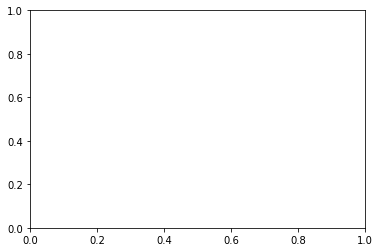

In [4]:
aapl=[0.5213675213675214, 0.5327635327635327, 0.5242165242165242, 0.5278174037089871, 0.5228571428571429, 0.5444126074498568, 0.5589080459770115, 0.5662824207492796, 0.5433526011560693, 0.5130434782608696, 0.5007299270072992, 0.6354319180087847, 0.6544117647058824, 0.5353982300884956, 0.5911111111111111, 0.4157973174366617, 0.4041916167664671, 0.44511278195488724, 0.48338368580060426, 0.5128983308042488, 0.6131498470948012, 0.6236559139784946, 0.6003110419906688, 0.627172195892575, 0.5826645264847512]
adbe=[0.5455950540958269, 0.5610510046367851, 0.5773993808049536, 0.6186046511627907, 0.6583850931677019, 0.6889580093312597, 0.7098283931357254, 0.702660406885759, 0.720125786163522, 0.7334384858044164, 0.7888888888888889, 0.7990430622009569, 0.8416, 0.8906752411575563, 0.9289176090468497, 0.9365853658536586, 0.9281045751633987, 0.9376026272577996, 0.9438943894389439, 0.9618573797678275, 0.9882943143812709, 1.0, 1.0, 1.0, 1.0]
adi=[0.5213675213675214, 0.5313390313390314, 0.550641940085592, 0.5428571428571428, 0.5436337625178826, 0.5415472779369628, 0.5517241379310345, 0.569164265129683, 0.6034732272069464, 0.5892597968069666, 0.5883211678832116, 0.5791788856304986, 0.5441176470588235, 0.518463810930576, 0.46735905044510384, 0.45671641791044776, 0.4587706146926537, 0.4879518072289157, 0.5128593040847201, 0.5486322188449848, 0.4946401225114854, 0.5261538461538462, 0.5514018691588785, 0.7215189873417721, 0.6270096463022508]
googl=[0.5014245014245015, 0.5213675213675214, 0.5292439372325249, 0.5378031383737518, 0.5665236051502146, 0.5702005730659025, 0.5933908045977011, 0.6123919308357348, 0.5745296671490593, 0.5761973875181422, 0.6262773722627737, 0.6310395314787701, 0.5985294117647059, 0.5634218289085545, 0.5170370370370371, 0.47242921013412814, 0.48353293413173654, 0.48270676691729325, 0.49244712990936557, 0.496206373292868, 0.4954128440366973, 0.5407066052227343, 0.671850699844479, 0.6524486571879937, 0.6725521669341894]
results=np.add(aapl,adbe)
results=np.add(results,adi)
results=np.add(results,googl)
tot=results/4

print(tot)
plt.plot(trendwindowtime,tot)
plt.show()